# Artificial Neural Network (ANN)

## Table of contents

### [1. Libraries import and Data preparation](#1)

### [2. Artificial Neural Network](#2)
#### [2.1 First iteration](#2.1)
#### [2.2 Second iteration](#2.2)
#### [2.3 Third iteration](#2.3)
#### [2.4 Fourth iteration](#2.4)
#### [2.5 Fifth iteration](#2.5)
#### [2.6 Sixth iteration](#2.6)


## 1. Libraries import and Data preparation
<div id='1'></div>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


##to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Creating paths to the data folder of the project and to the folder for saving the charts
path_data = r"C:\Users\dacol\Documents\Data Project - careerfoundry\ClimateWins_ML\02 Data"

# Importing the unscaled dataframe
df_weather = pd.read_csv(os.path.join(path_data,'Original Data','Dataset-weather-prediction-dataset-processed.csv'), sep =',')

# Importing the rated dataframe for pleasant days
df_rate = pd.read_csv(os.path.join(path_data,'Original Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), sep =',')

In [5]:
print(df_weather.shape)
print(df_rate.shape)

(22950, 170)
(22950, 16)


In [7]:
df_rate.describe()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
count,2.295000e+04,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.0,22950.000000,22950.000000
mean,1.990984e+07,0.246797,0.348235,0.323791,0.194292,0.214989,0.216078,0.164444,0.277821,0.207669,0.446492,0.207712,0.155948,0.0,0.169673,0.051155
std,1.813833e+05,0.431157,0.476421,0.467931,0.395663,0.410824,0.411577,0.370686,0.447935,0.405647,0.497140,0.405679,0.362814,0.0,0.375354,0.220318
min,1.960010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.975092e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.991060e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.007021e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,2.022103e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


**NOTE** : Sonnblick station only has 0 (unpleasant) days : either the data is incomplete, either it is never a good day in this high place of Austria.

In [10]:
#isolating the columns names from the rate df since some weather stations are missing
rate_columns = df_rate.columns.to_list()

In [12]:
#isolating the weather columns to check for the stations to trim
weather_columns = df_weather.columns.to_list()

In [14]:
#splitting the column names to isolate the stations names
answer_stations = [col.split('_')[0] for col in rate_columns if '_' in col ]

In [16]:
#keeping only the weather stations maatching the stations from the rates
weather_stations = [col for col in weather_columns if col.split('_')[0] in answer_stations]

In [18]:
#creating a new df with the desired columns
df_weather_new = df_weather[weather_stations]
df_weather_new.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [20]:
#Preparing weather df with only the temperatures (exclusion of dates and stations of ROMA, TOURS & GDANSK) as X

X = df_weather_new

X.shape

(22950, 147)

In [22]:
#Preparing rating df with only the stations' daily rates (exclusion of dates)as y

In [24]:
y = df_rate.drop(['DATE'], axis=1)

y.shape

(22950, 15)

## 2. Artificial Neural Network
<div id='2'></div>

In [27]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16065, 147)
(6885, 147)
(16065, 15)
(6885, 15)


In [31]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.40976379 -1.27592231 -0.97848779 ... -0.01491551 -0.00912216
  -0.01021701]
 [-1.82475729 -0.0309972  -2.51363017 ... -0.01491551  0.26454276
  -0.29691797]
 [ 0.25021021 -0.0309972   1.45967951 ...  1.2754488   1.33183599
   1.05057652]
 ...
 [-2.23975079 -0.0309972   0.73725957 ... -0.76512732 -0.6385515
  -0.78430959]
 [ 0.25021021 -0.0309972  -0.25606785 ... -0.4650426  -0.20068761
  -0.66962921]
 [-0.16478329  0.52230285 -1.06879029 ...  2.62583006  2.50859518
   2.36940092]]


In [33]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

### 2.1 First iteration
<div id='2.1'></div>

In [36]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [40]:
y_pred_train = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.48110799875505755
0.48990559186637617


In [42]:
locations = list({x.split("_")[0] for x in df_rate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

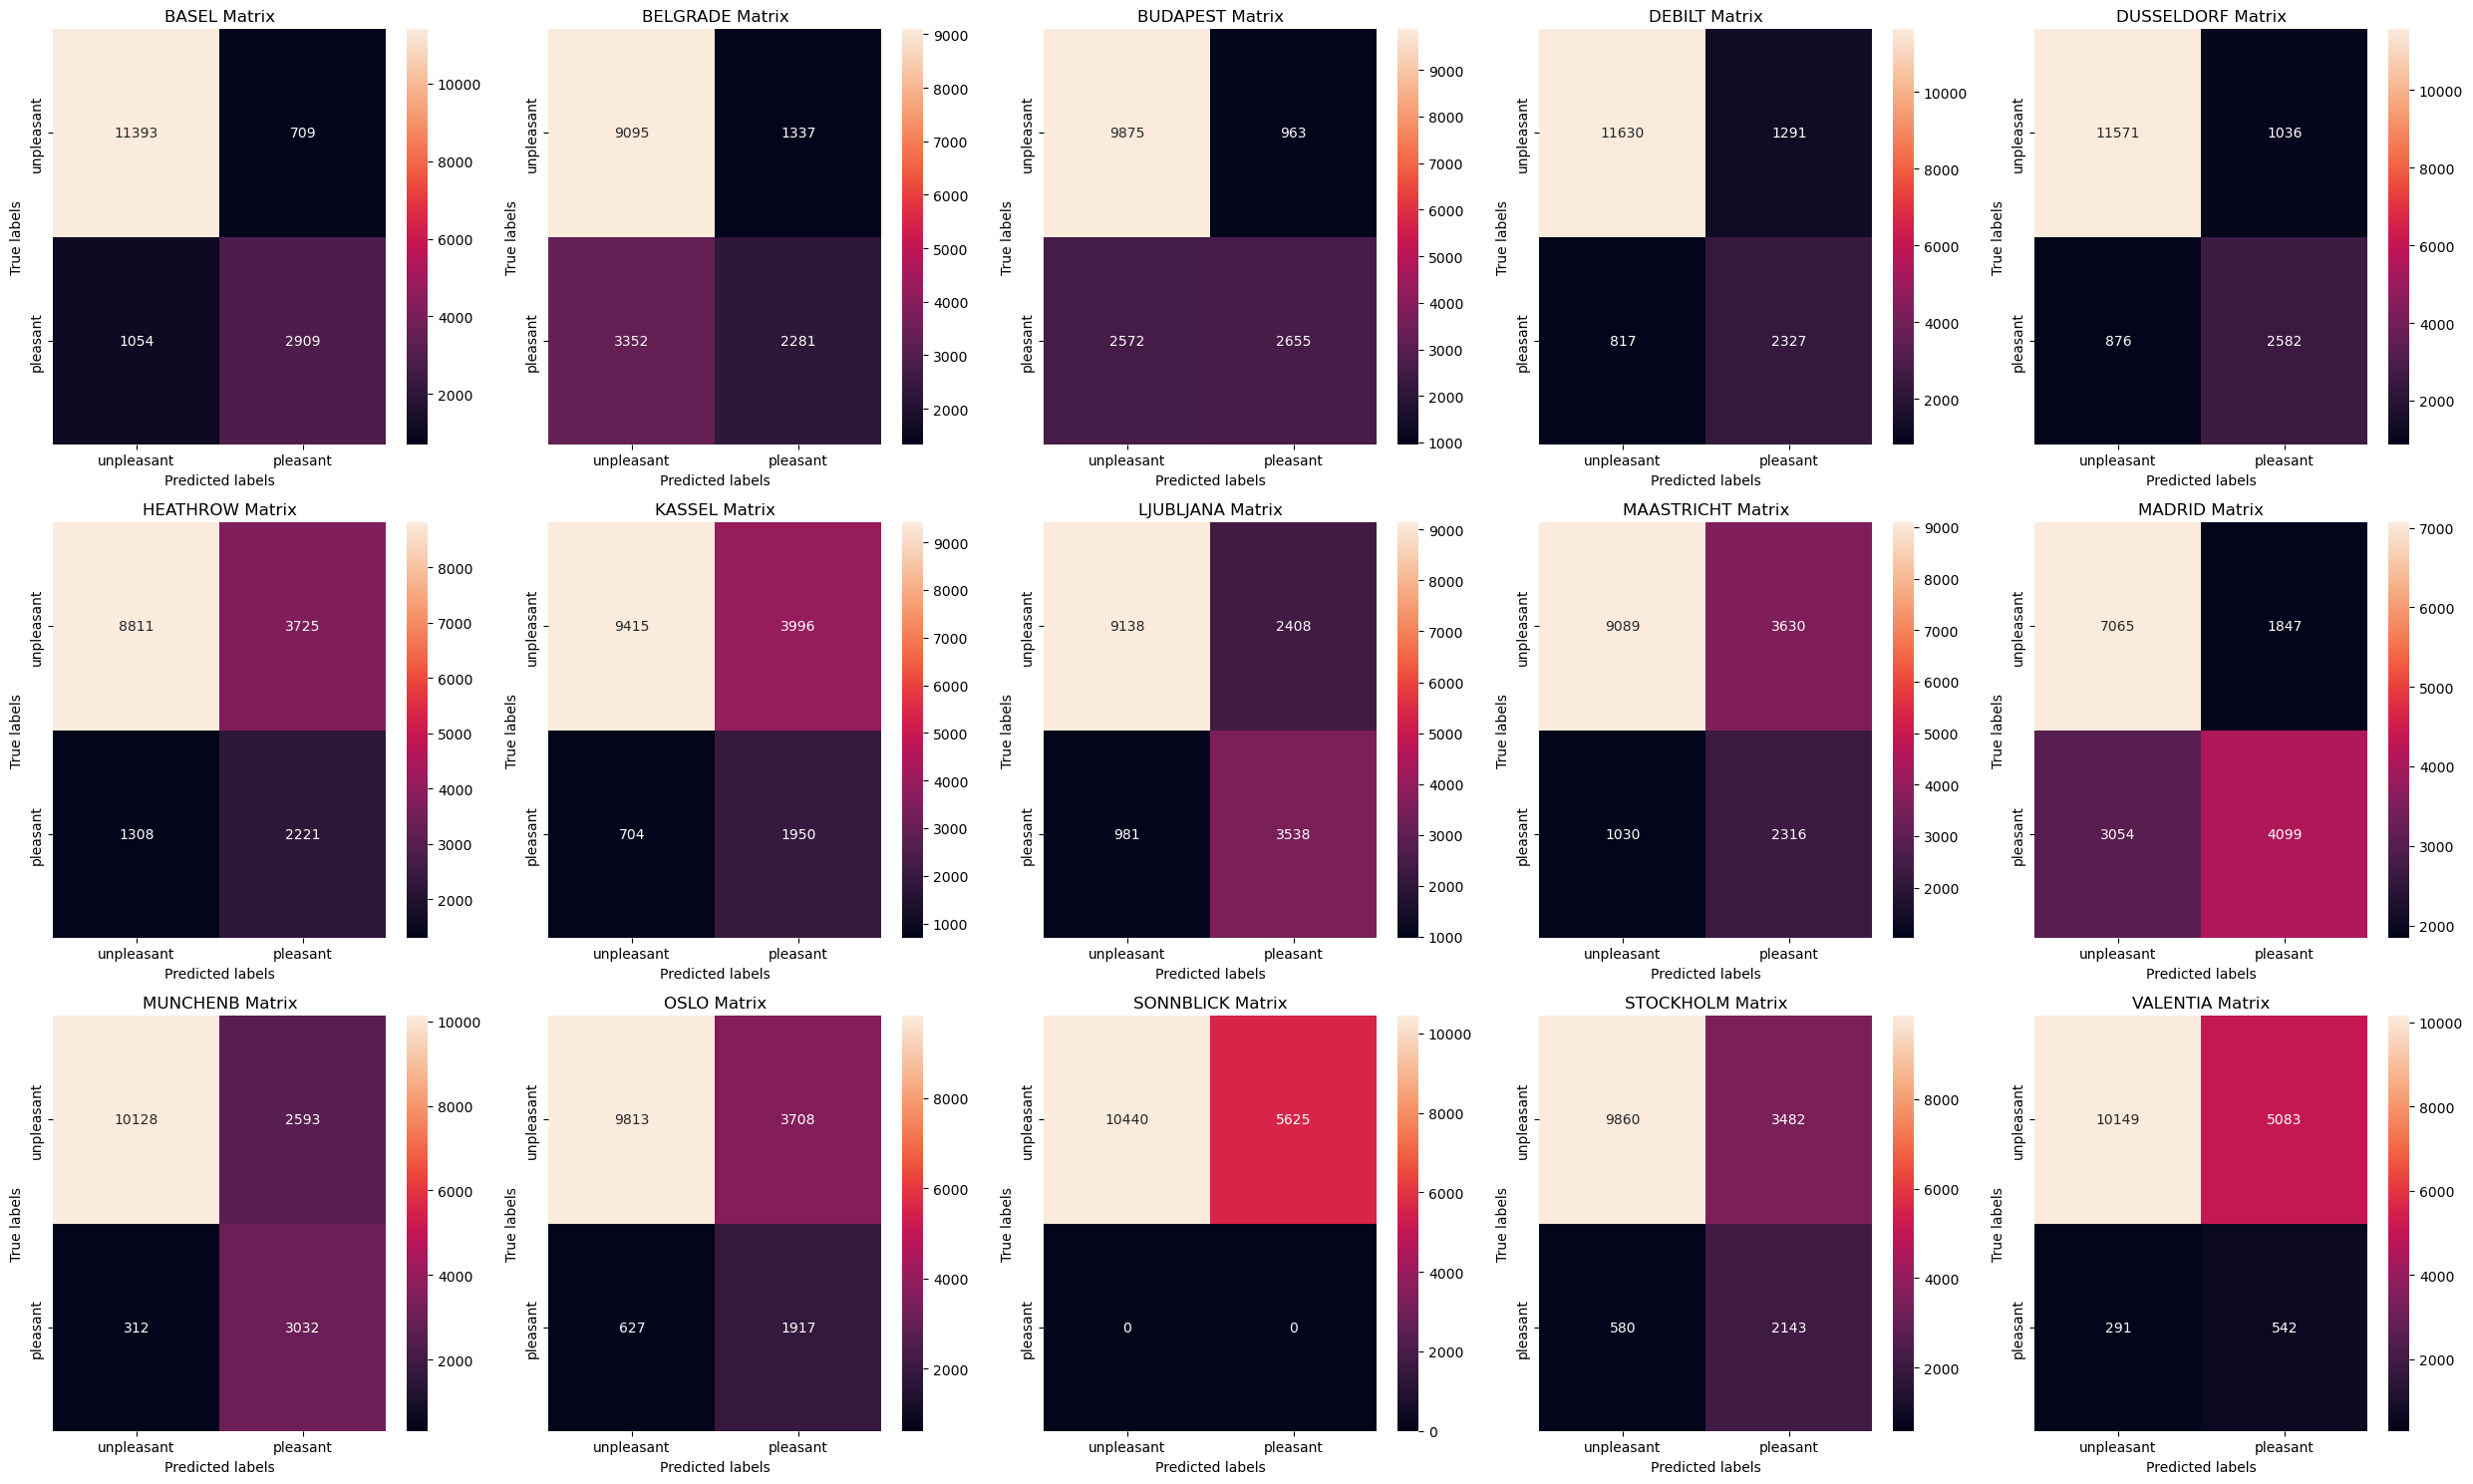

In [44]:
#Confusion matrix on the train data
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:, i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.tight_layout()

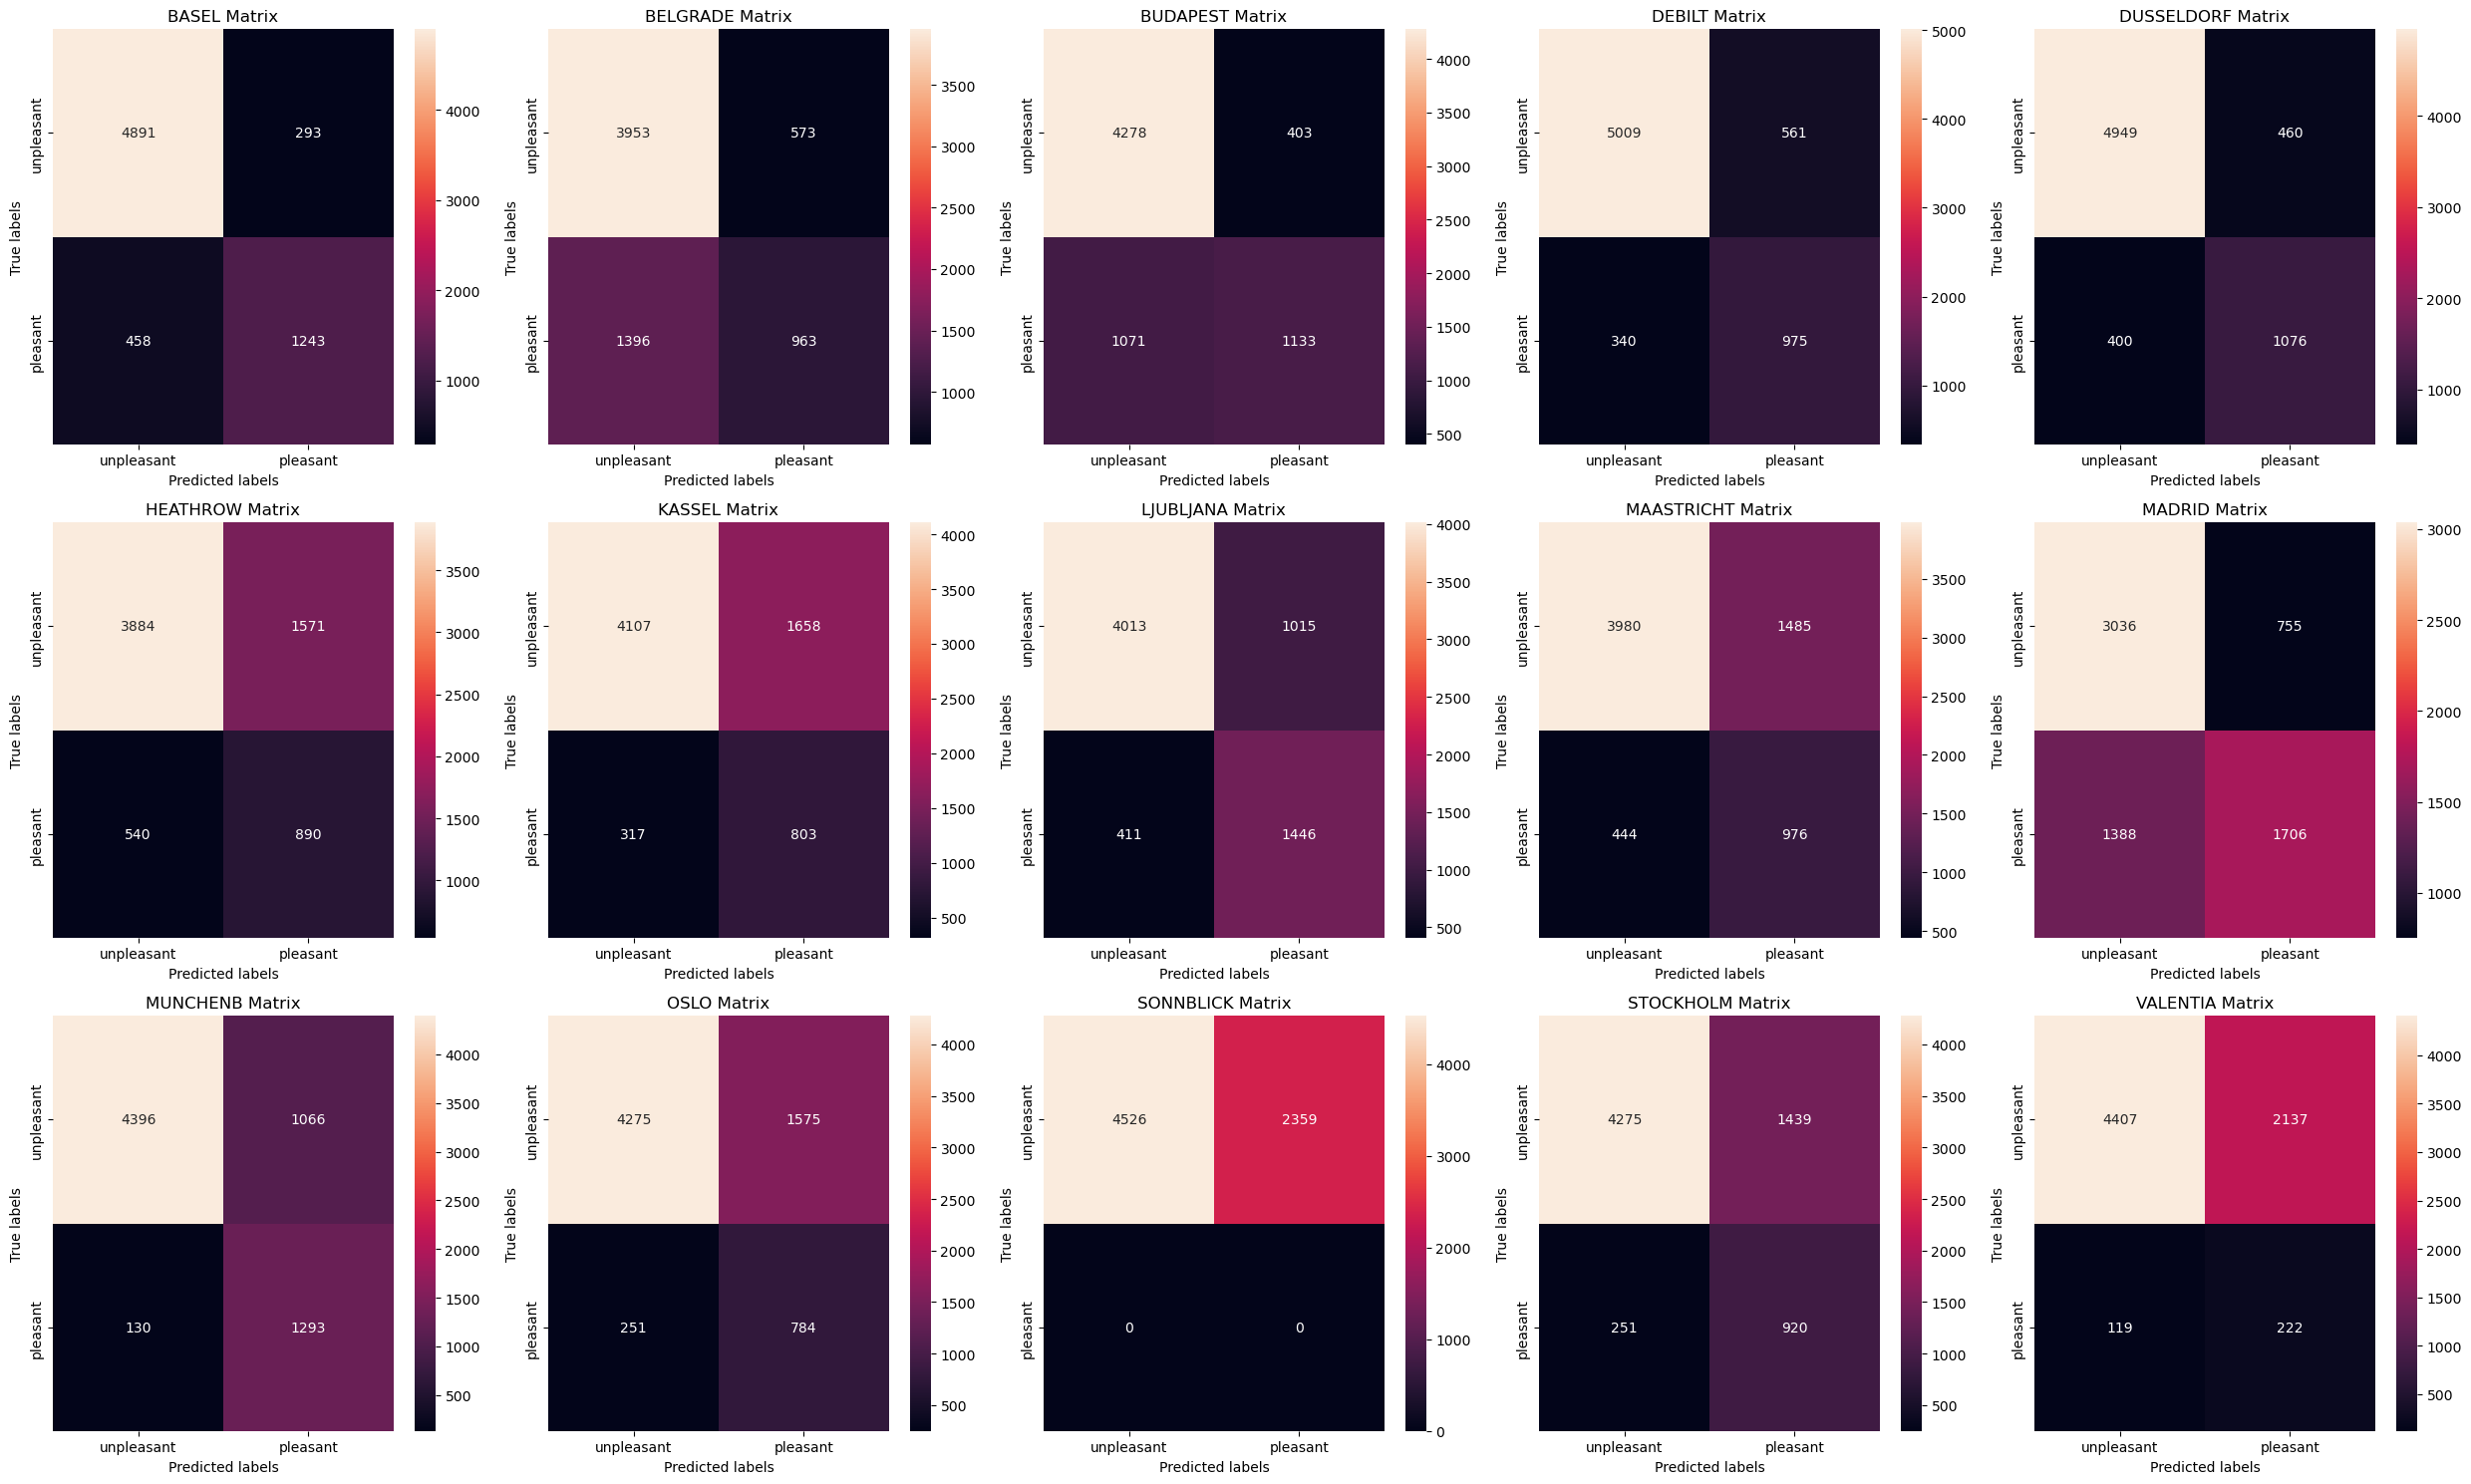

In [46]:
#Confusion matrix on the test data
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']     
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:, i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.tight_layout()

### 2.2 Second iteration
<div id='2.1'></div>

In [49]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [51]:
y_pred_train = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.48110799875505755
0.562962962962963


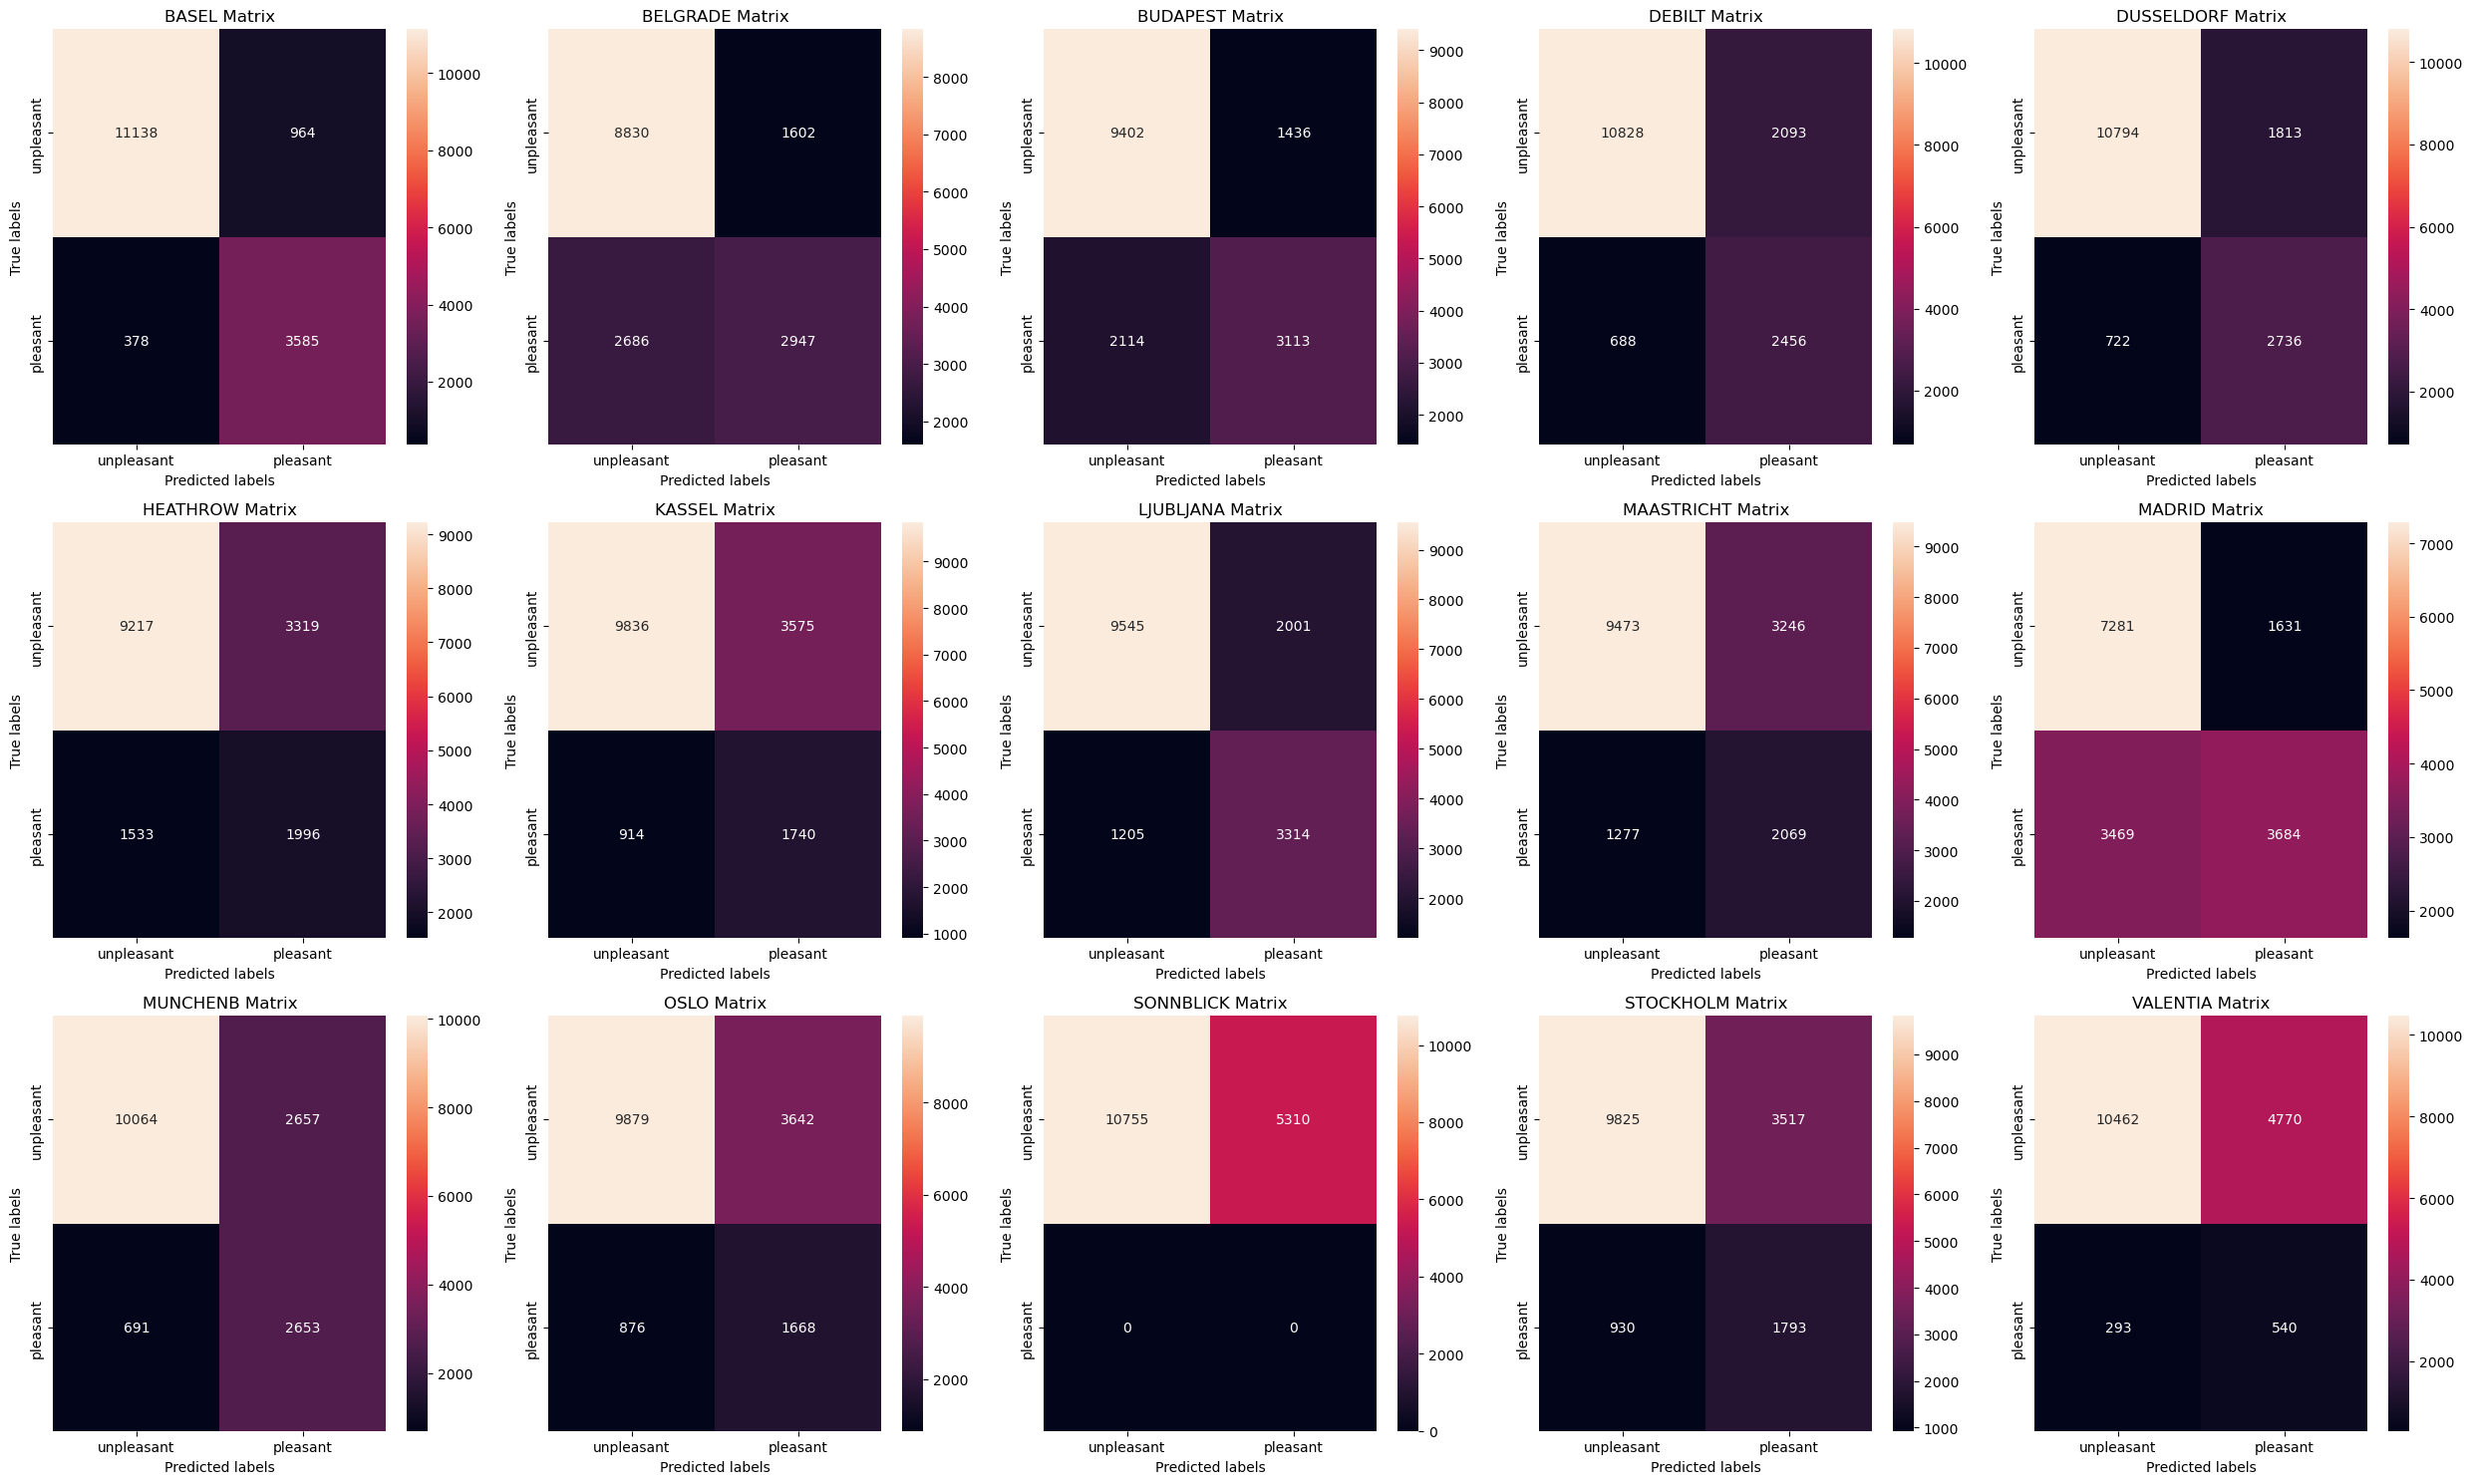

In [53]:
#Confusion matrix on the train data
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:, i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.tight_layout()

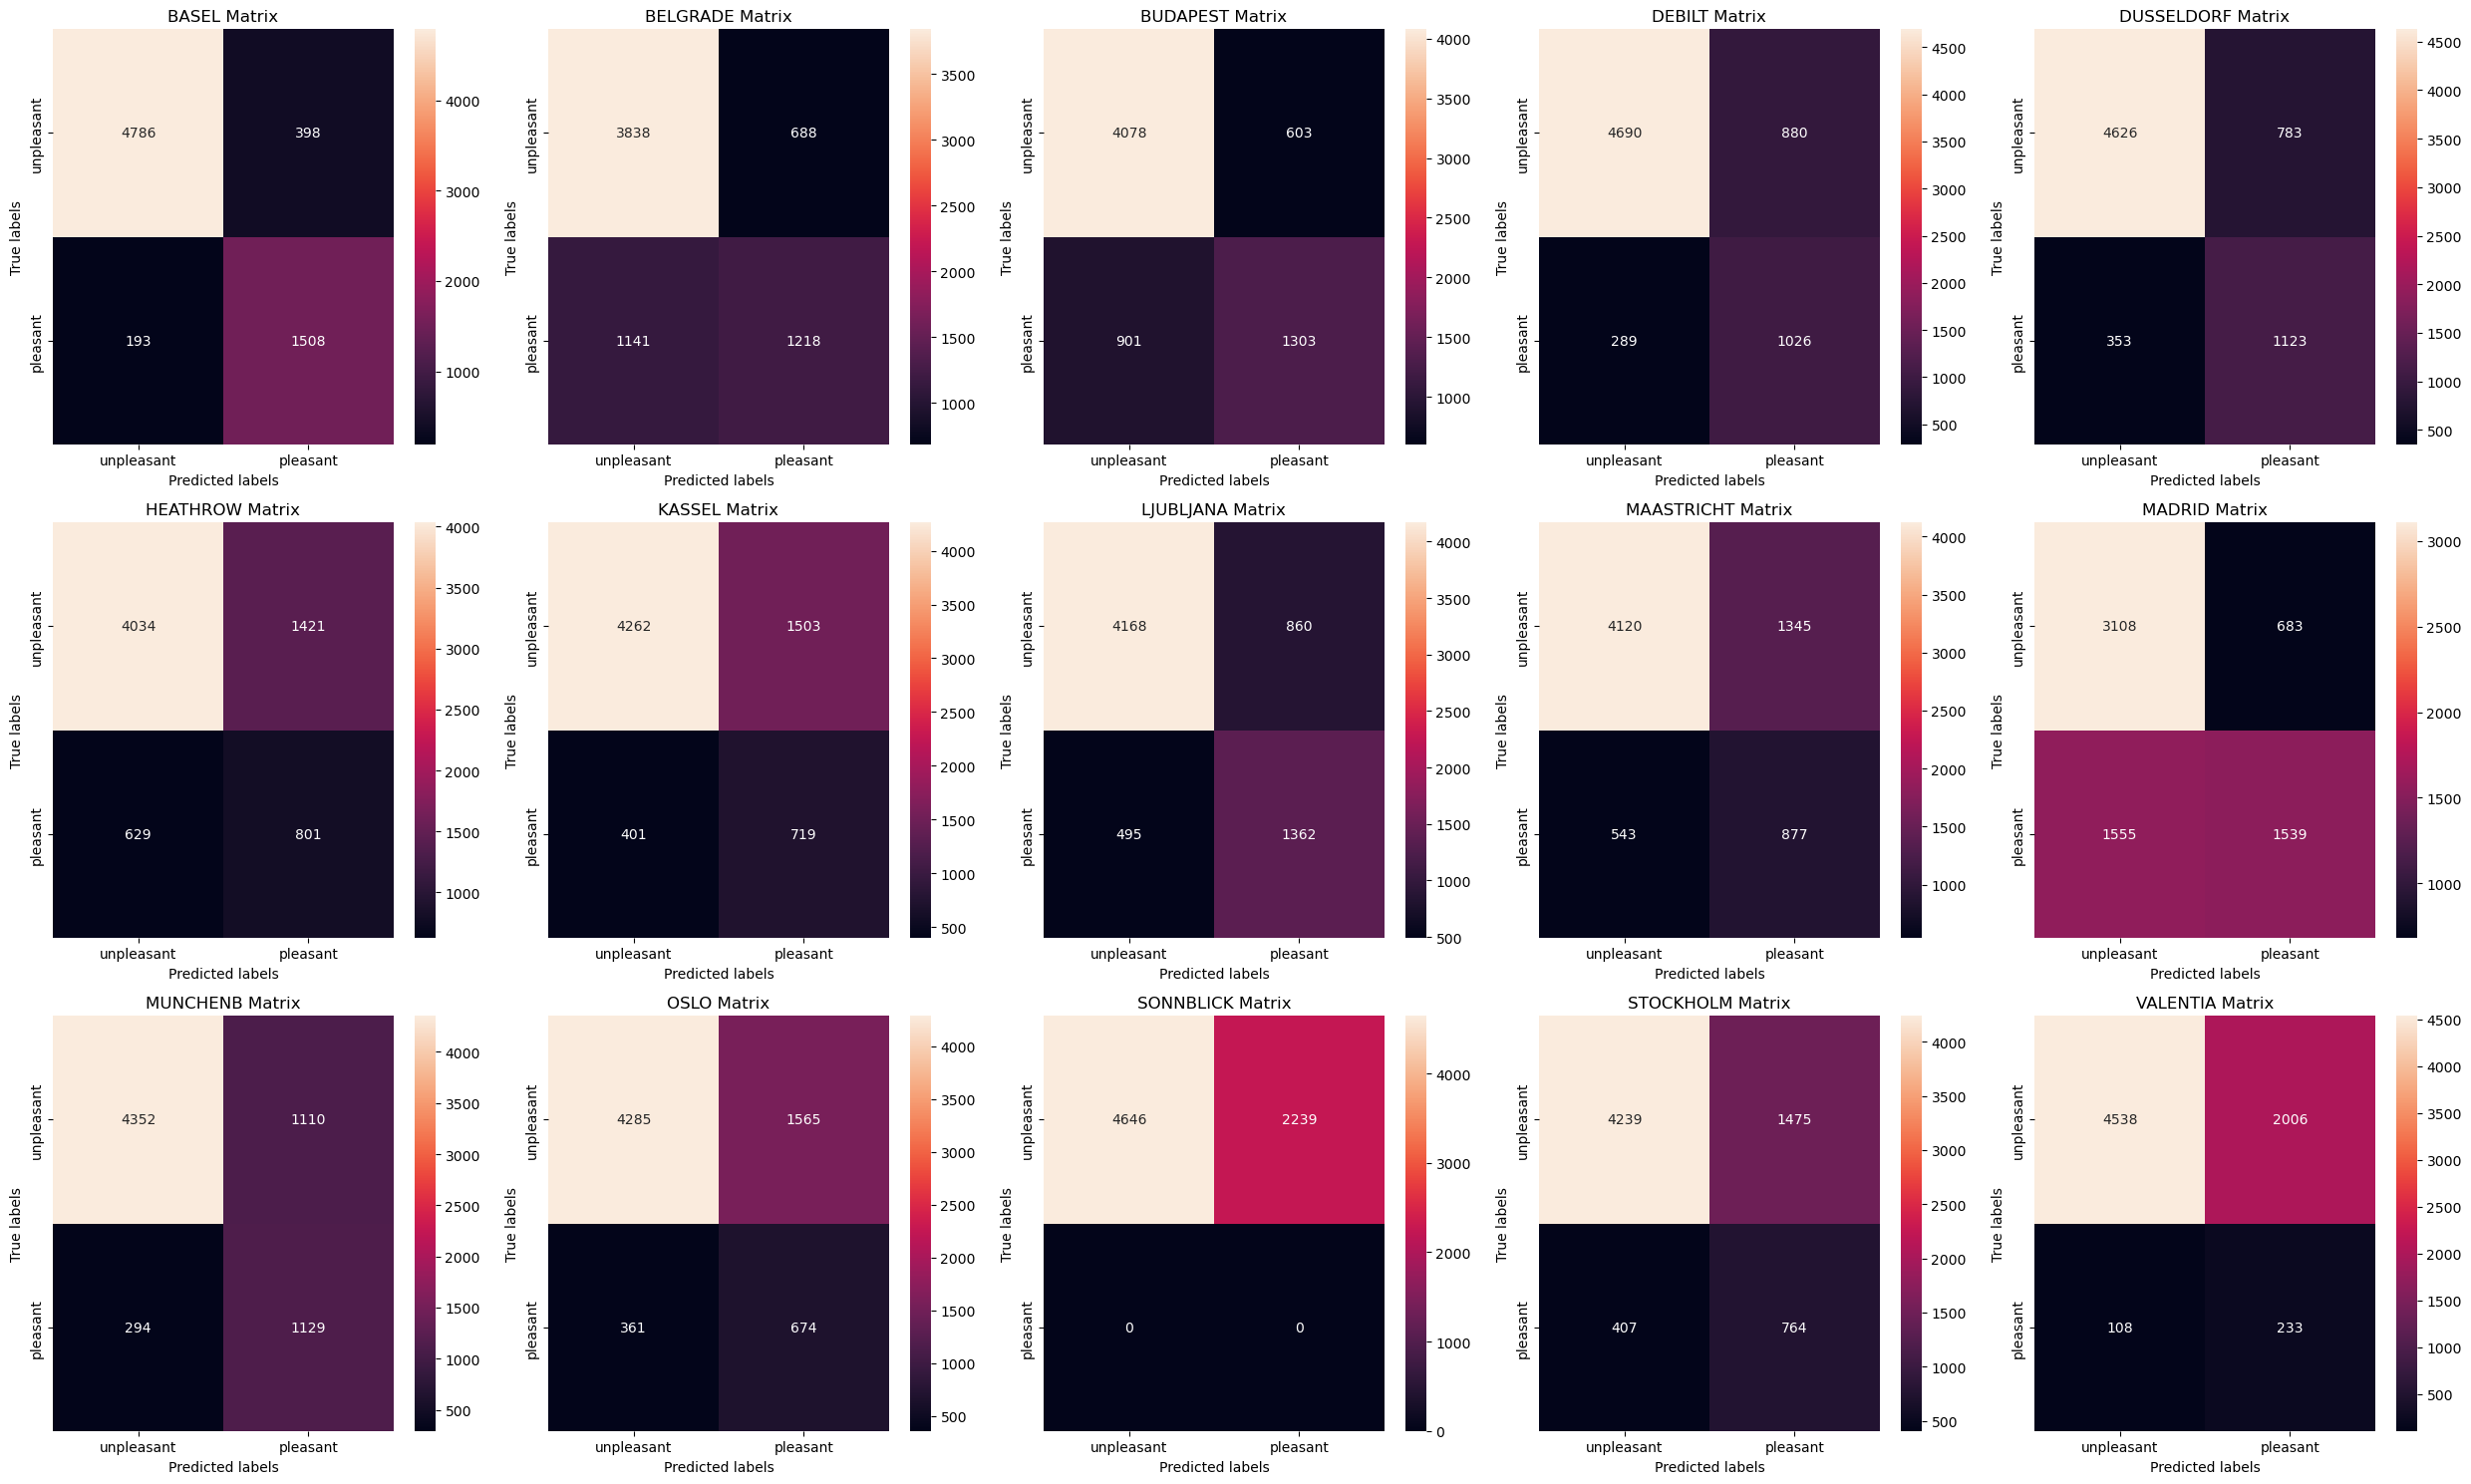

In [54]:
#Confusion matrix on the test data
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']     
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:, i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.tight_layout()

### 2.3 Third iteration
<div id='2.3'></div>

In [70]:
# List of weather stations
stations = locations

# Initialize dictionaries to store models, scores, and confusion matrices
models = {}
scores = {}
y_train_dict = {}
y_test_dict = {}
y_pred_train_dict = {}
y_pred_test_dict = {}

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and predict using ANN models for each station
for station in stations:
    # Prepare the data for the station
    X_station = X_scaled[:, [j for j, col in enumerate(X.columns) if col.startswith(station)]]
    y_station = y[station + '_pleasant_weather']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_station, y_station, test_size=0.3, random_state=42)
    
    # Create and train the ANN model
    model = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
    model.fit(X_train, y_train)
    
    # Predict the labels for training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate the accuracy score
    score = accuracy_score(y_test, y_pred_test)
    scores[station] = score
    
    # Store the true labels and predictions
    y_train_dict[station] = y_train
    y_test_dict[station] = y_test
    y_pred_train_dict[station] = y_pred_train
    y_pred_test_dict[station] = y_pred_test

# Print accuracy scores for each station
for station, score in scores.items():
    print(f'{station}: Accuracy = {score:.4f}')


BASEL: Accuracy = 0.9987
BELGRADE: Accuracy = 0.9996
BUDAPEST: Accuracy = 0.9996
DEBILT: Accuracy = 0.9994
DUSSELDORF: Accuracy = 0.9936
HEATHROW: Accuracy = 0.9991
KASSEL: Accuracy = 0.9988
LJUBLJANA: Accuracy = 0.9985
MAASTRICHT: Accuracy = 0.9993
MADRID: Accuracy = 0.9974
MUNCHENB: Accuracy = 0.9984
OSLO: Accuracy = 0.9924
SONNBLICK: Accuracy = 1.0000
STOCKHOLM: Accuracy = 0.9955
VALENTIA: Accuracy = 0.9956


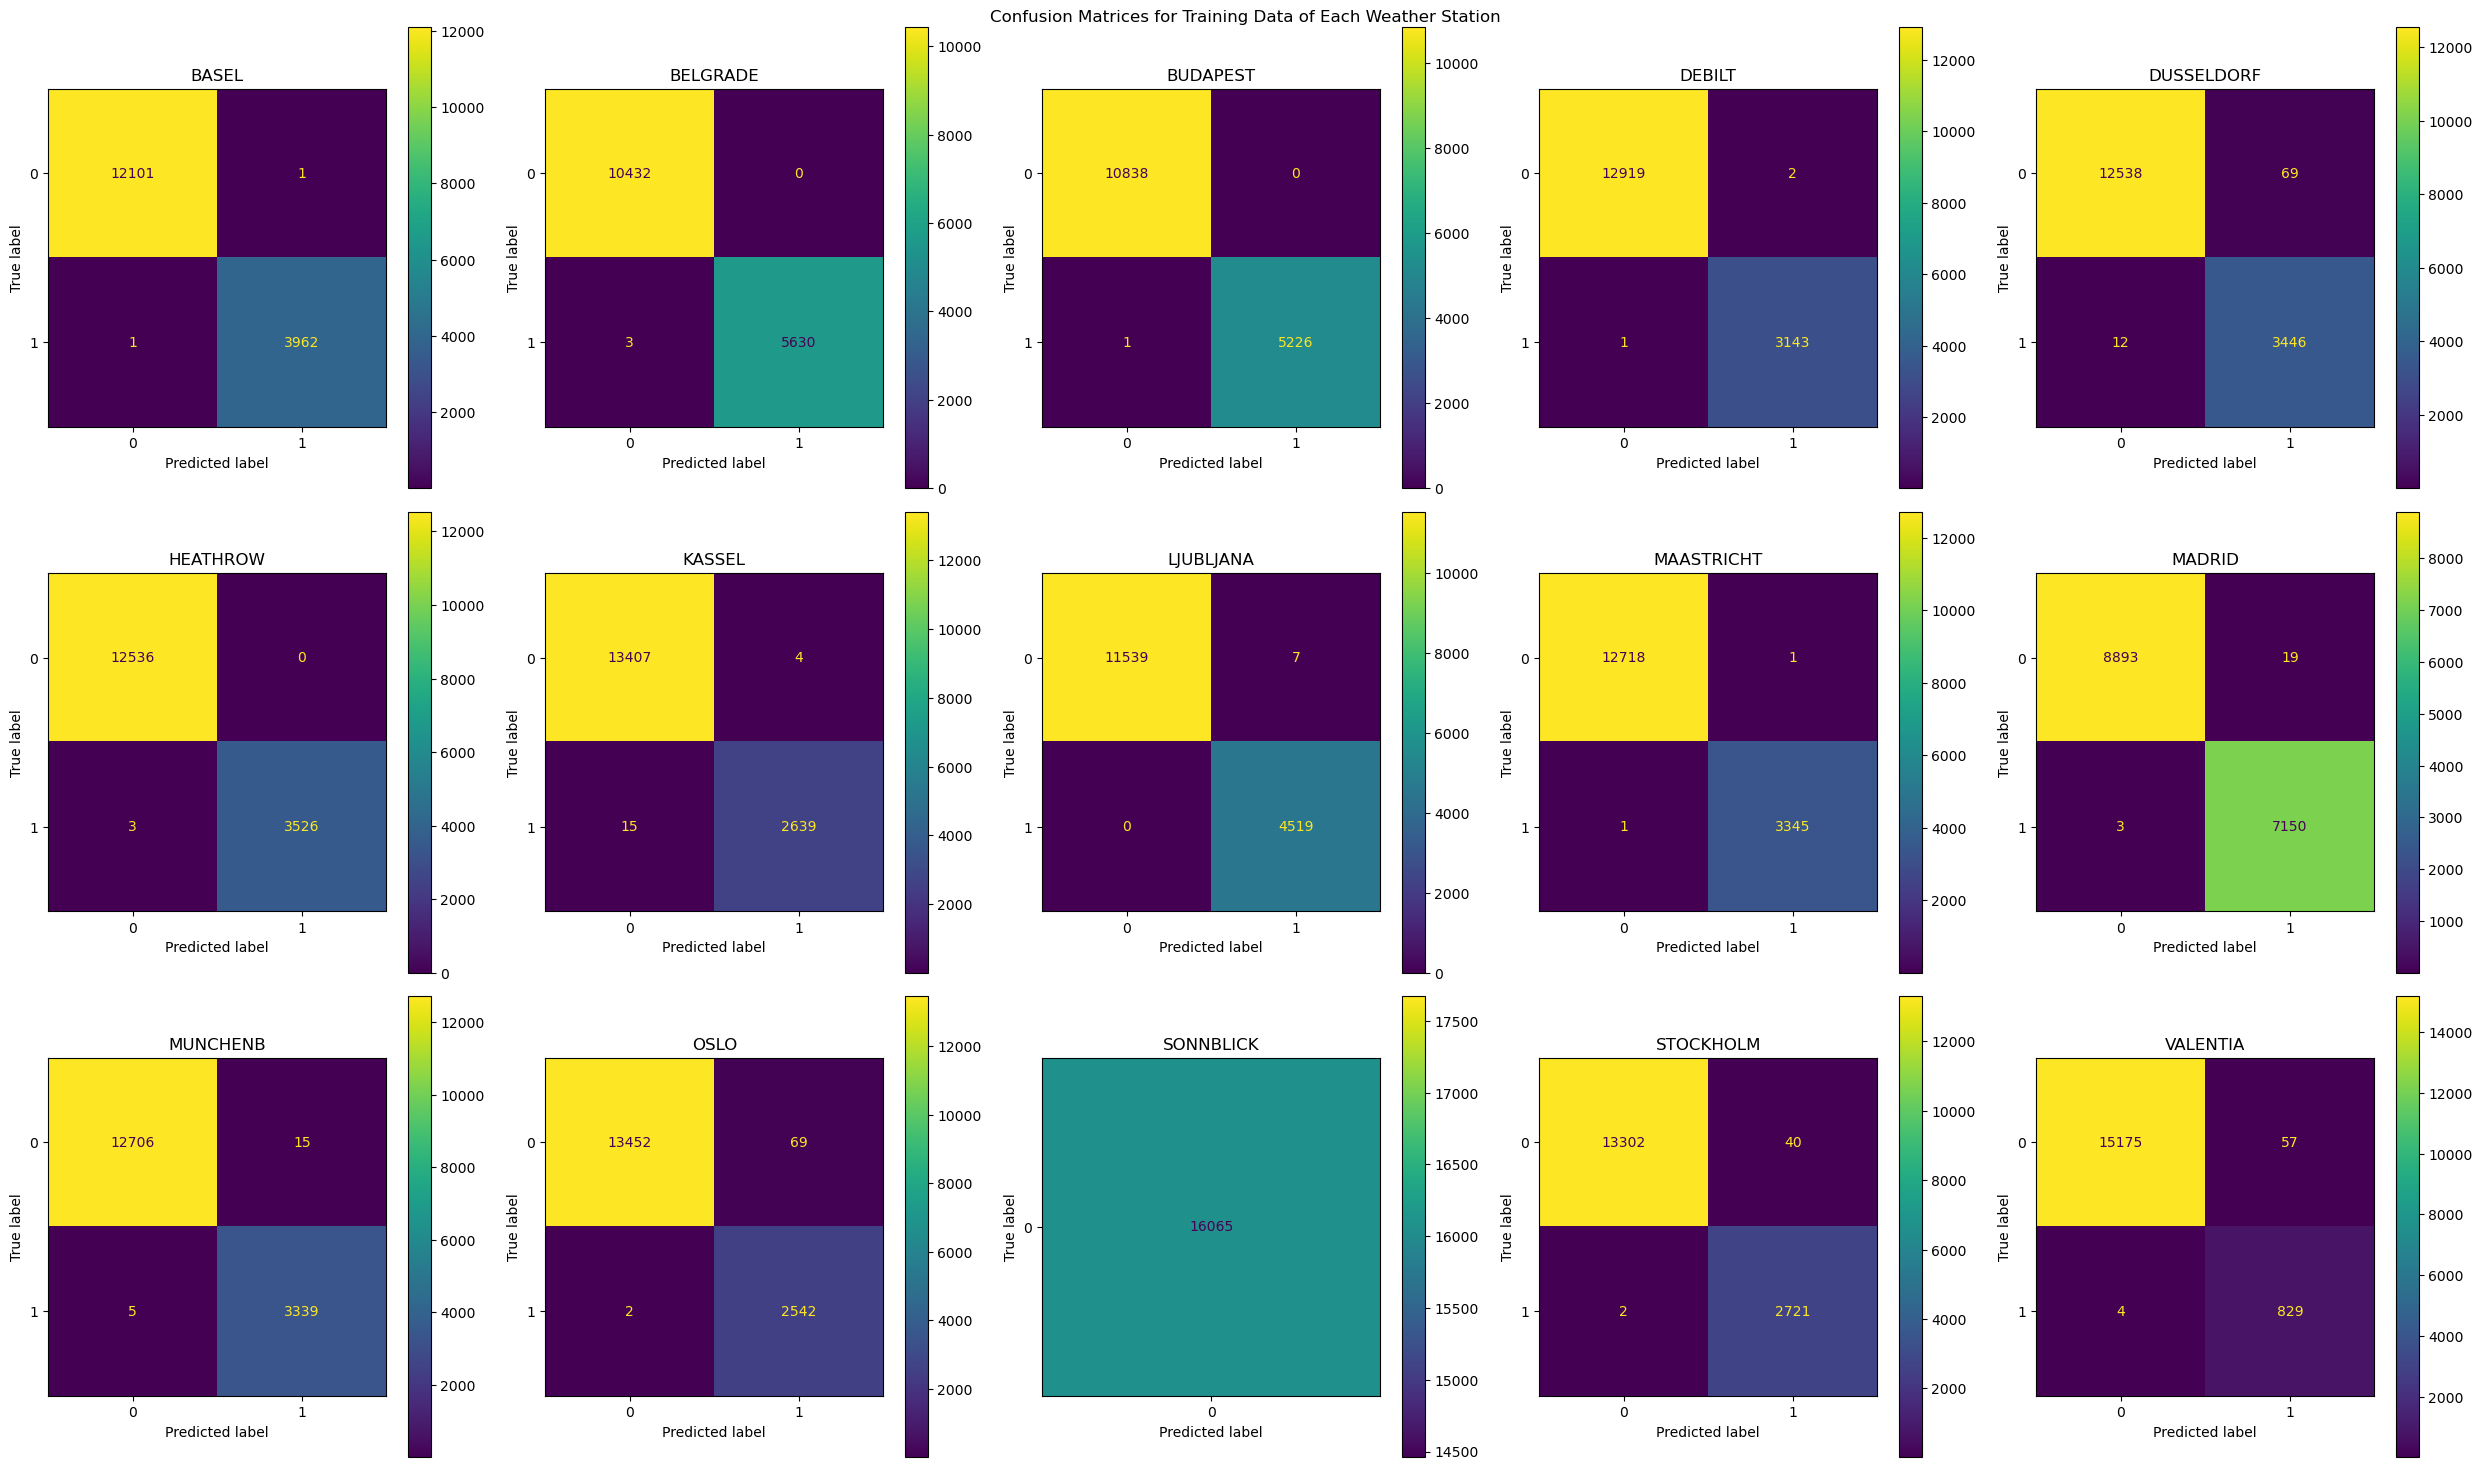

In [71]:
# Create and display confusion matrices for training data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Training Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_train_station = y_train_dict[station]
    y_pred_train_station = y_pred_train_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_train_station, y_pred_train_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()

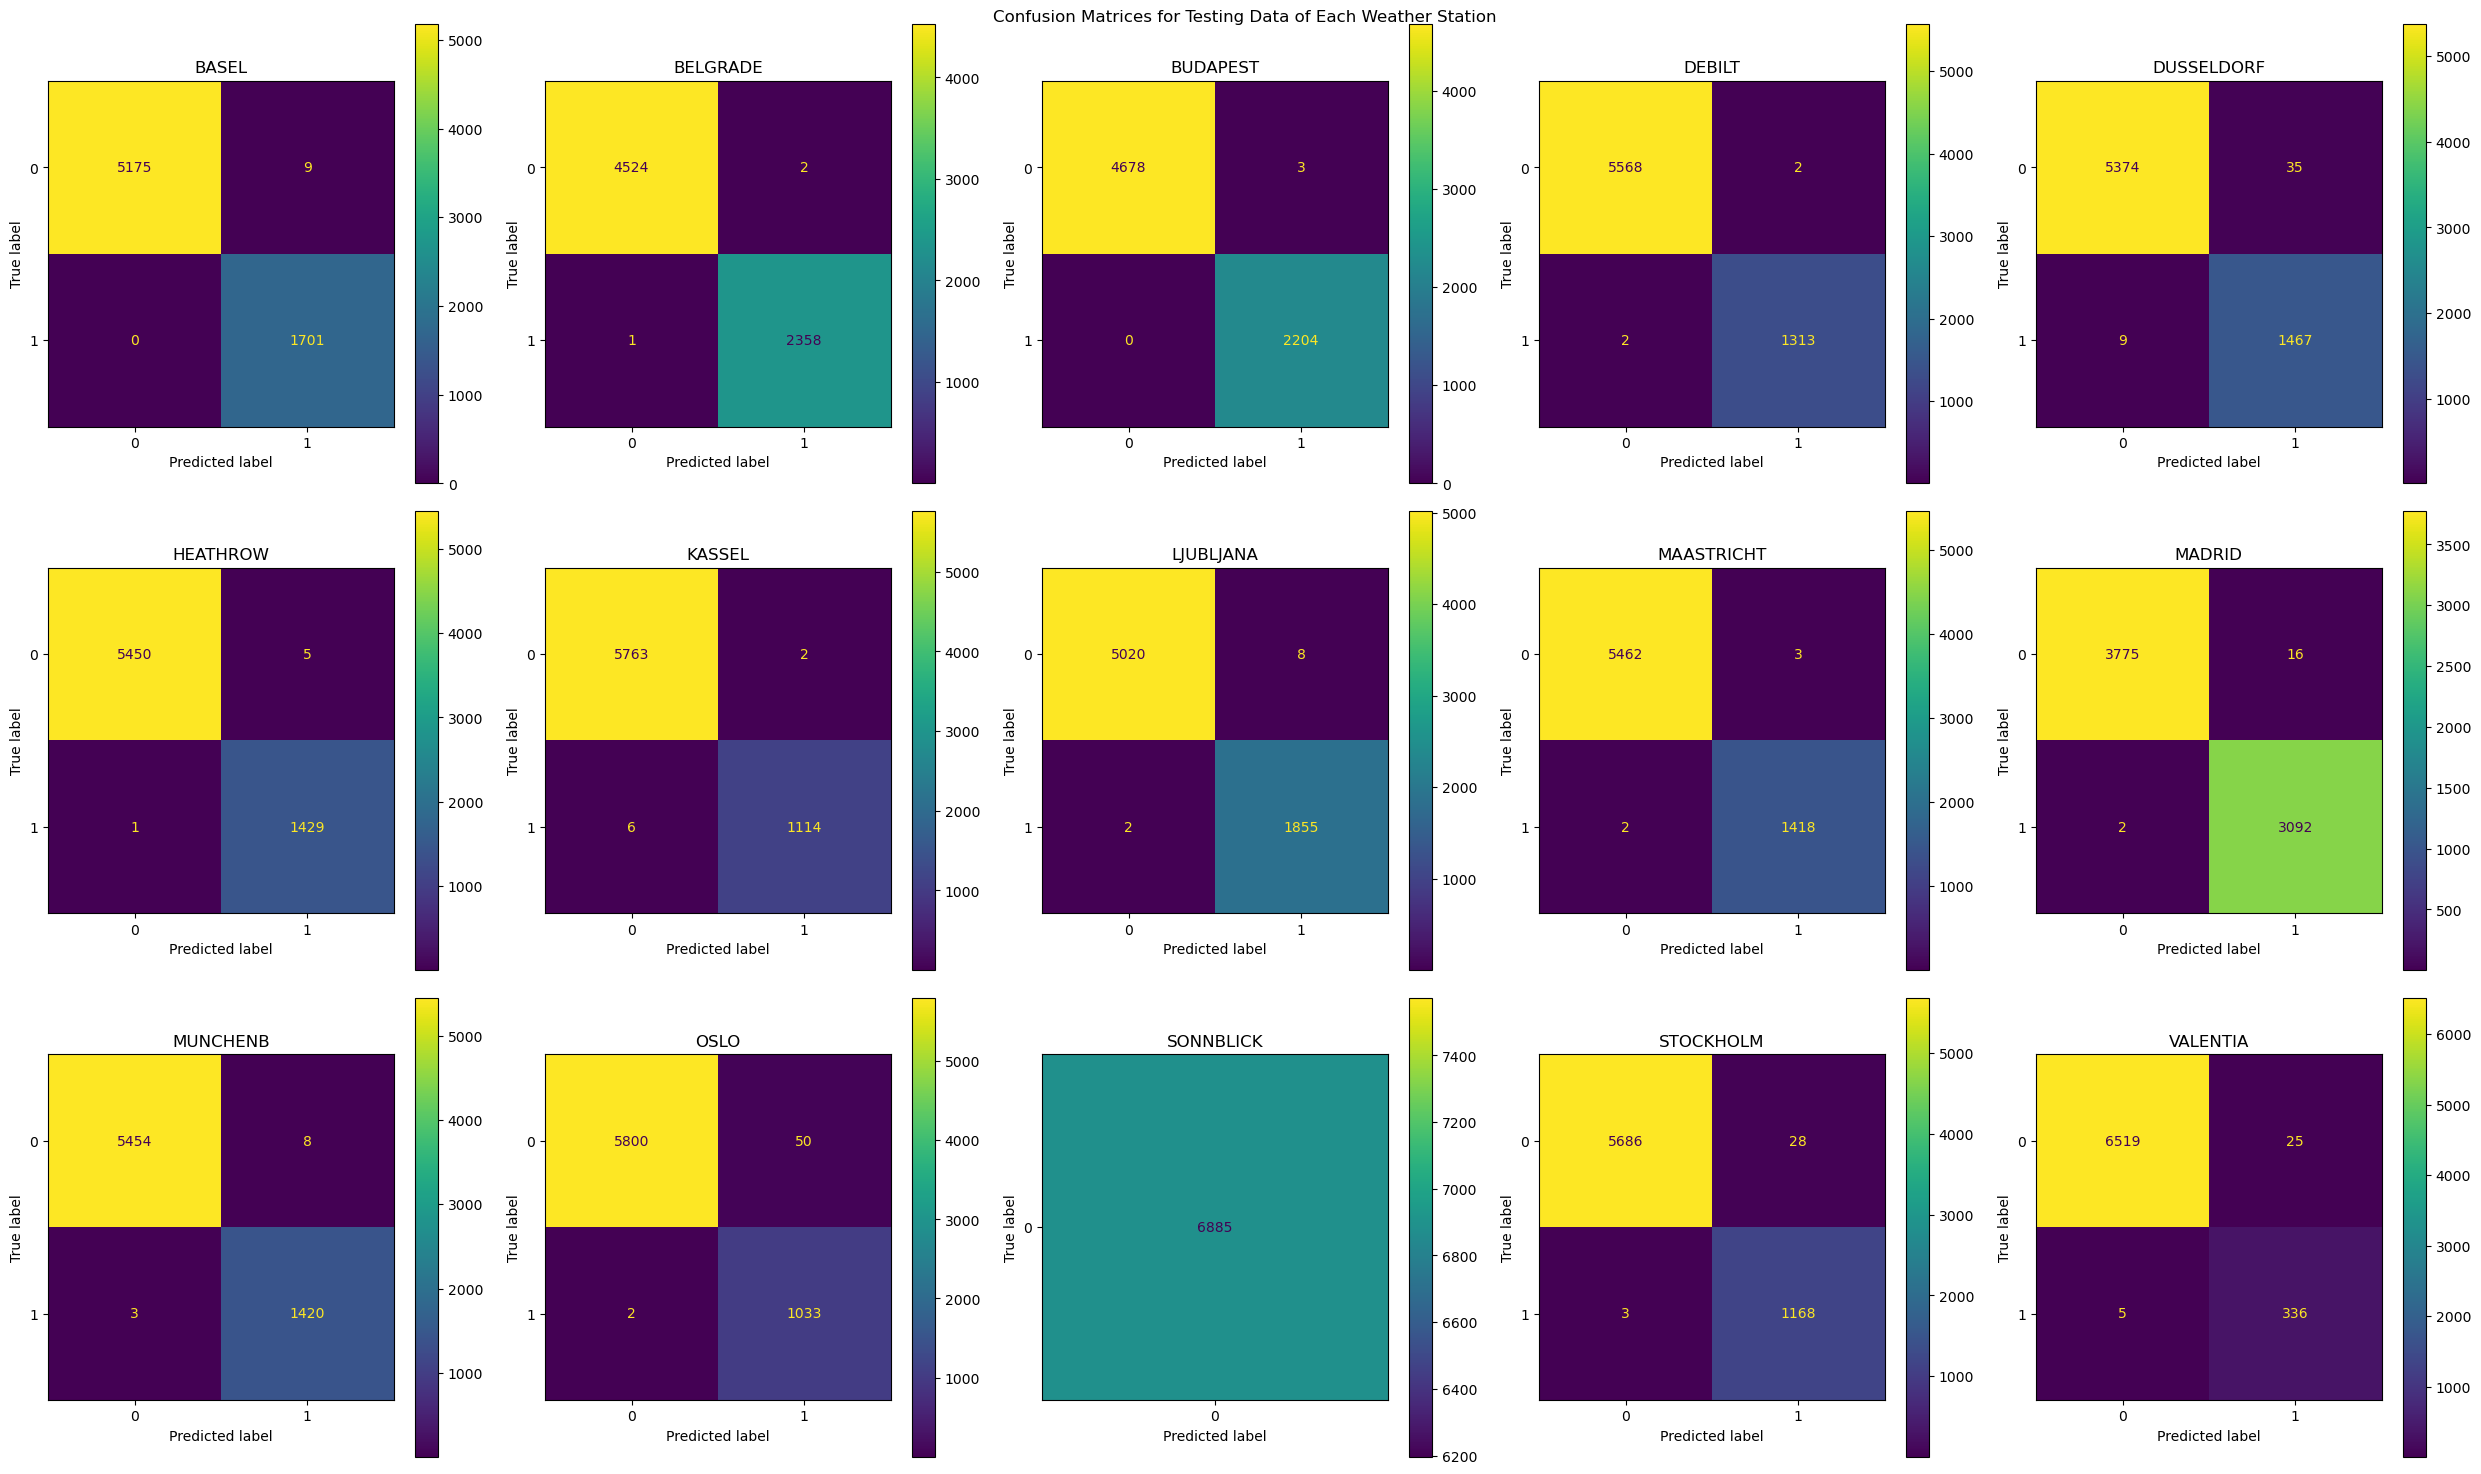

In [72]:
# Create and display confusion matrices for testing data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Testing Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_test_station = y_test_dict[station]
    y_pred_test_station = y_pred_test_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test_station, y_pred_test_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()

### 2.3 Fourth iteration
<div id='2.4'></div>

In [70]:
#Adding a new hidden layer of 10 nodes, no modification on the iterations and tolerance

# List of weather stations
stations = locations

# Initialize dictionaries to store models, scores, and confusion matrices
models = {}
scores = {}
y_train_dict = {}
y_test_dict = {}
y_pred_train_dict = {}
y_pred_test_dict = {}

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and predict using ANN models for each station
for station in stations:
    # Prepare the data for the station
    X_station = X_scaled[:, [j for j, col in enumerate(X.columns) if col.startswith(station)]]
    y_station = y[station + '_pleasant_weather']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_station, y_station, test_size=0.3, random_state=42)
    
    # Create and train the ANN model
    model = MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=500, tol=0.0001) #here for the new parameter !
    model.fit(X_train, y_train)
    
    # Predict the labels for training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate the accuracy score
    score = accuracy_score(y_test, y_pred_test)
    scores[station] = score
    
    # Store the true labels and predictions
    y_train_dict[station] = y_train
    y_test_dict[station] = y_test
    y_pred_train_dict[station] = y_pred_train
    y_pred_test_dict[station] = y_pred_test

# Print accuracy scores for each station
for station, score in scores.items():
    print(f'{station}: Accuracy = {score:.4f}')


BASEL: Accuracy = 0.9987
BELGRADE: Accuracy = 0.9996
BUDAPEST: Accuracy = 0.9996
DEBILT: Accuracy = 0.9994
DUSSELDORF: Accuracy = 0.9936
HEATHROW: Accuracy = 0.9991
KASSEL: Accuracy = 0.9988
LJUBLJANA: Accuracy = 0.9985
MAASTRICHT: Accuracy = 0.9993
MADRID: Accuracy = 0.9974
MUNCHENB: Accuracy = 0.9984
OSLO: Accuracy = 0.9924
SONNBLICK: Accuracy = 1.0000
STOCKHOLM: Accuracy = 0.9955
VALENTIA: Accuracy = 0.9956


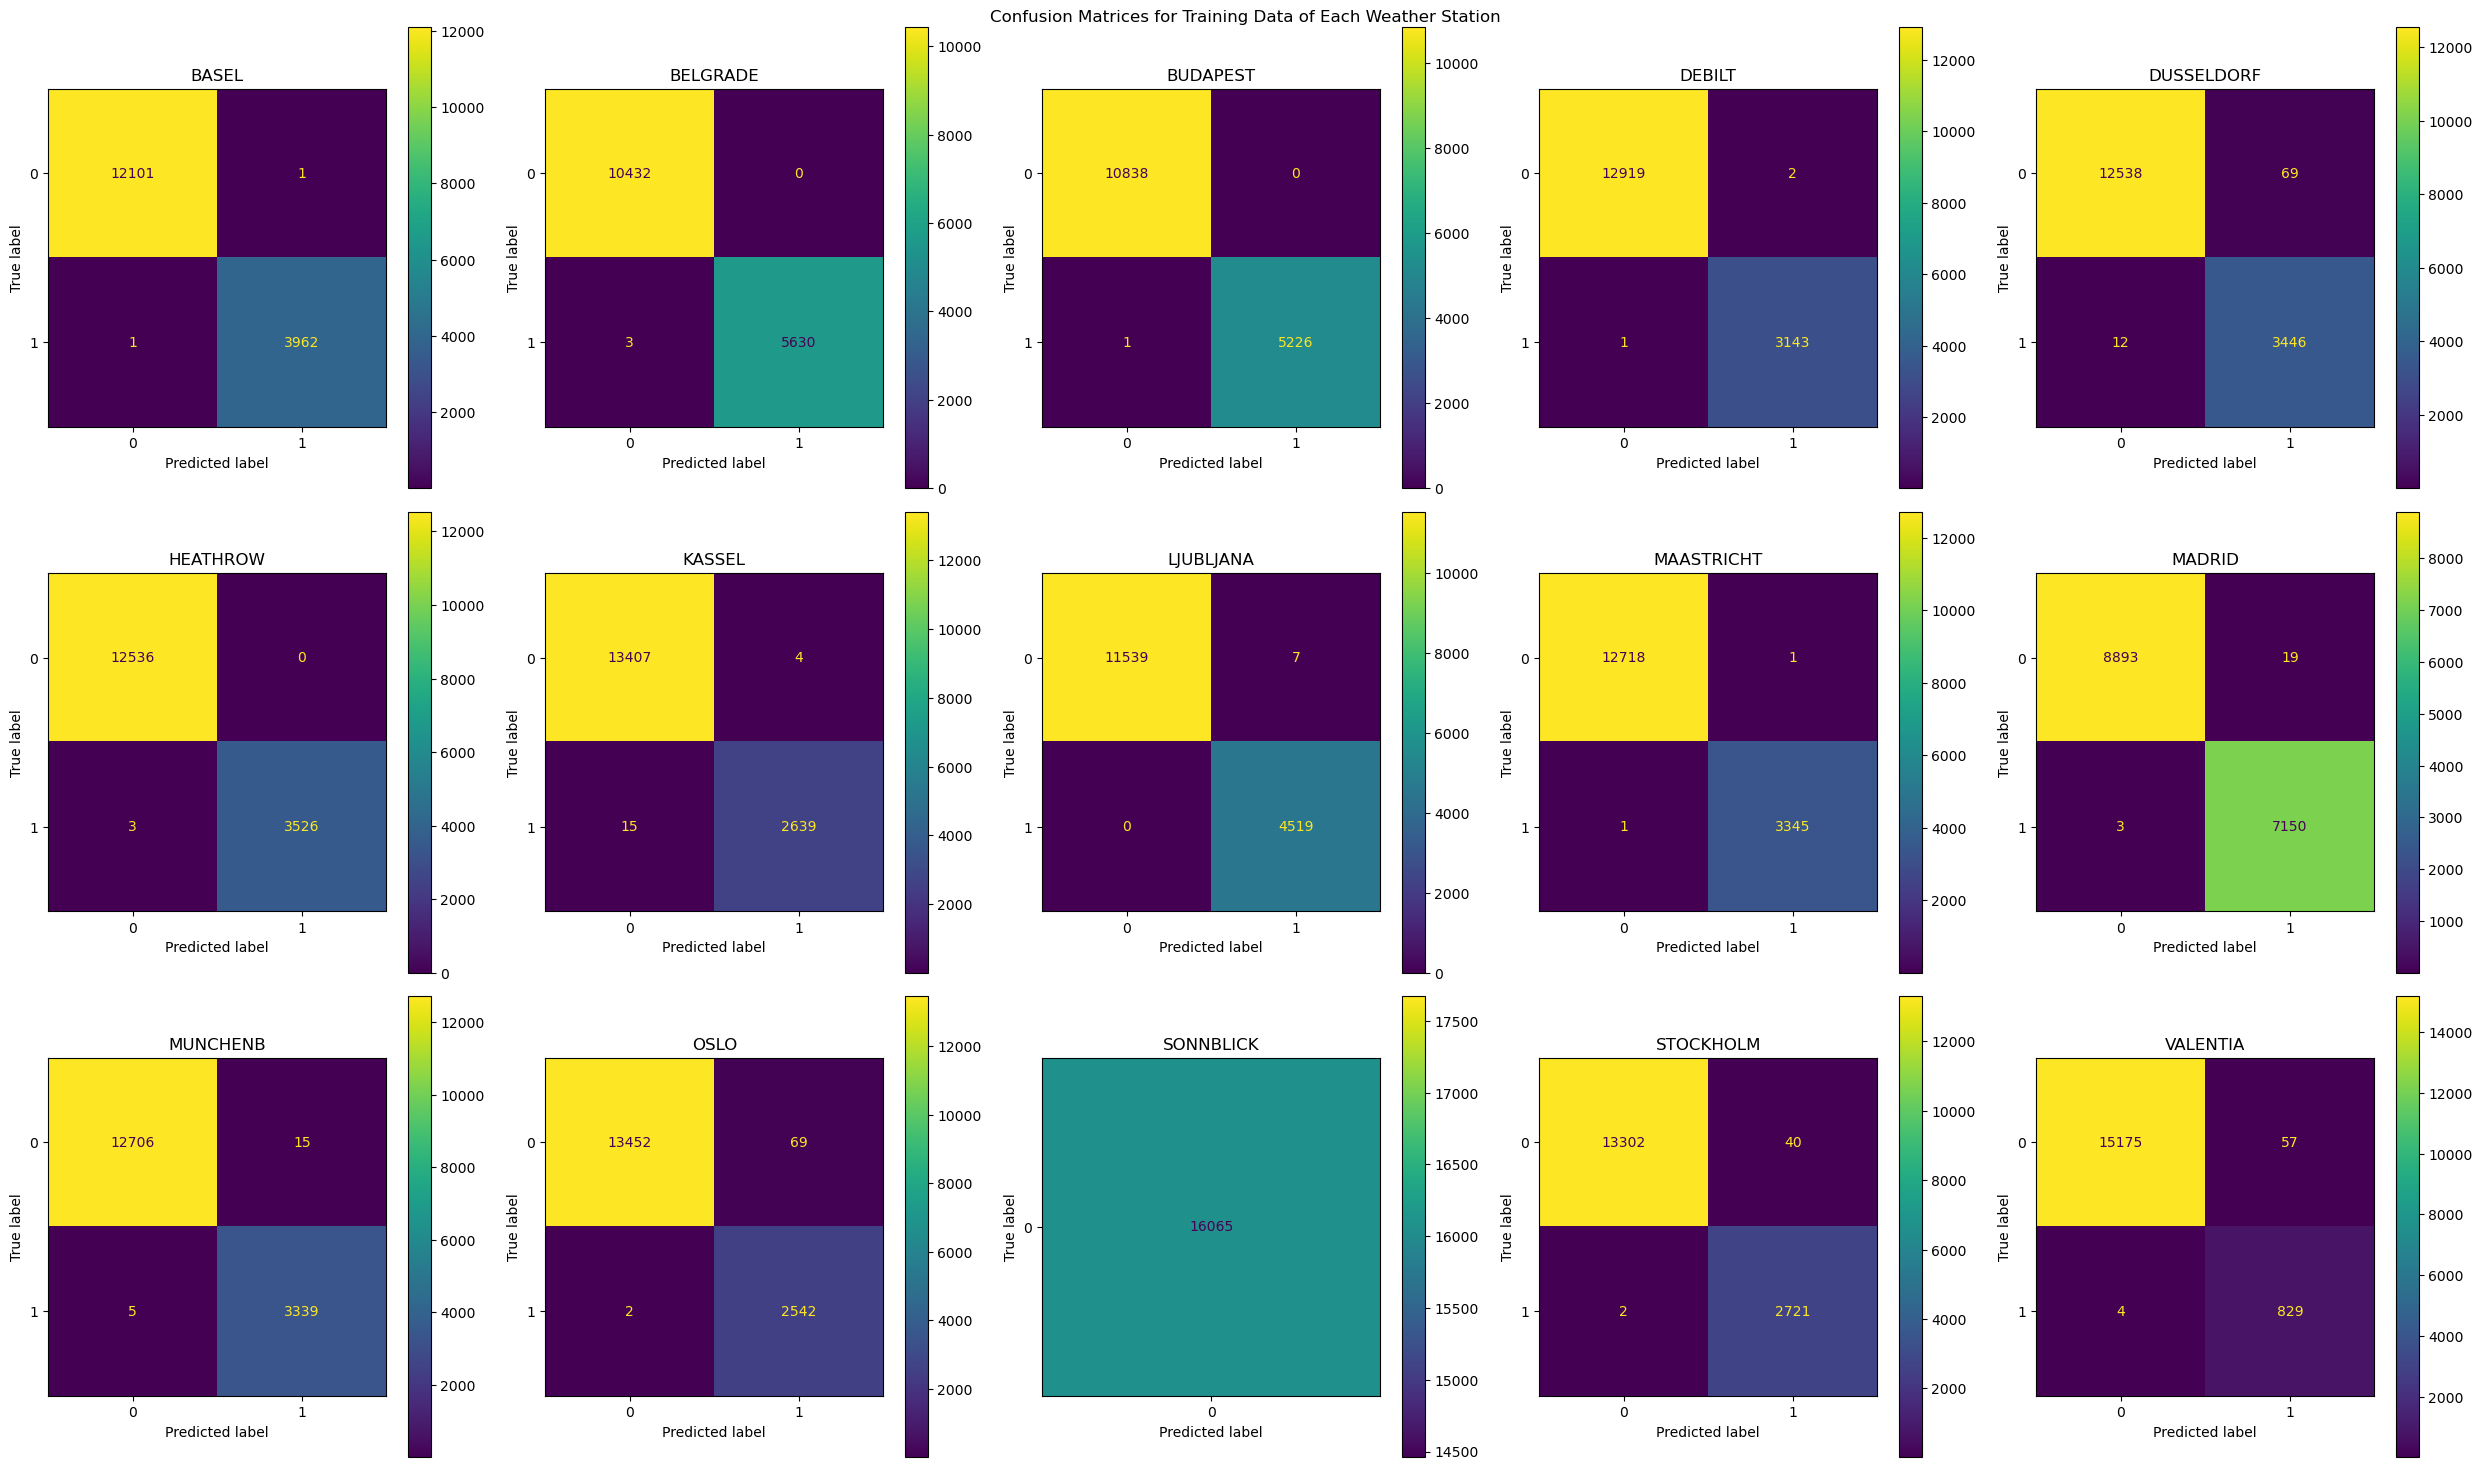

In [71]:
# Create and display confusion matrices for training data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Training Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_train_station = y_train_dict[station]
    y_pred_train_station = y_pred_train_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_train_station, y_pred_train_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()

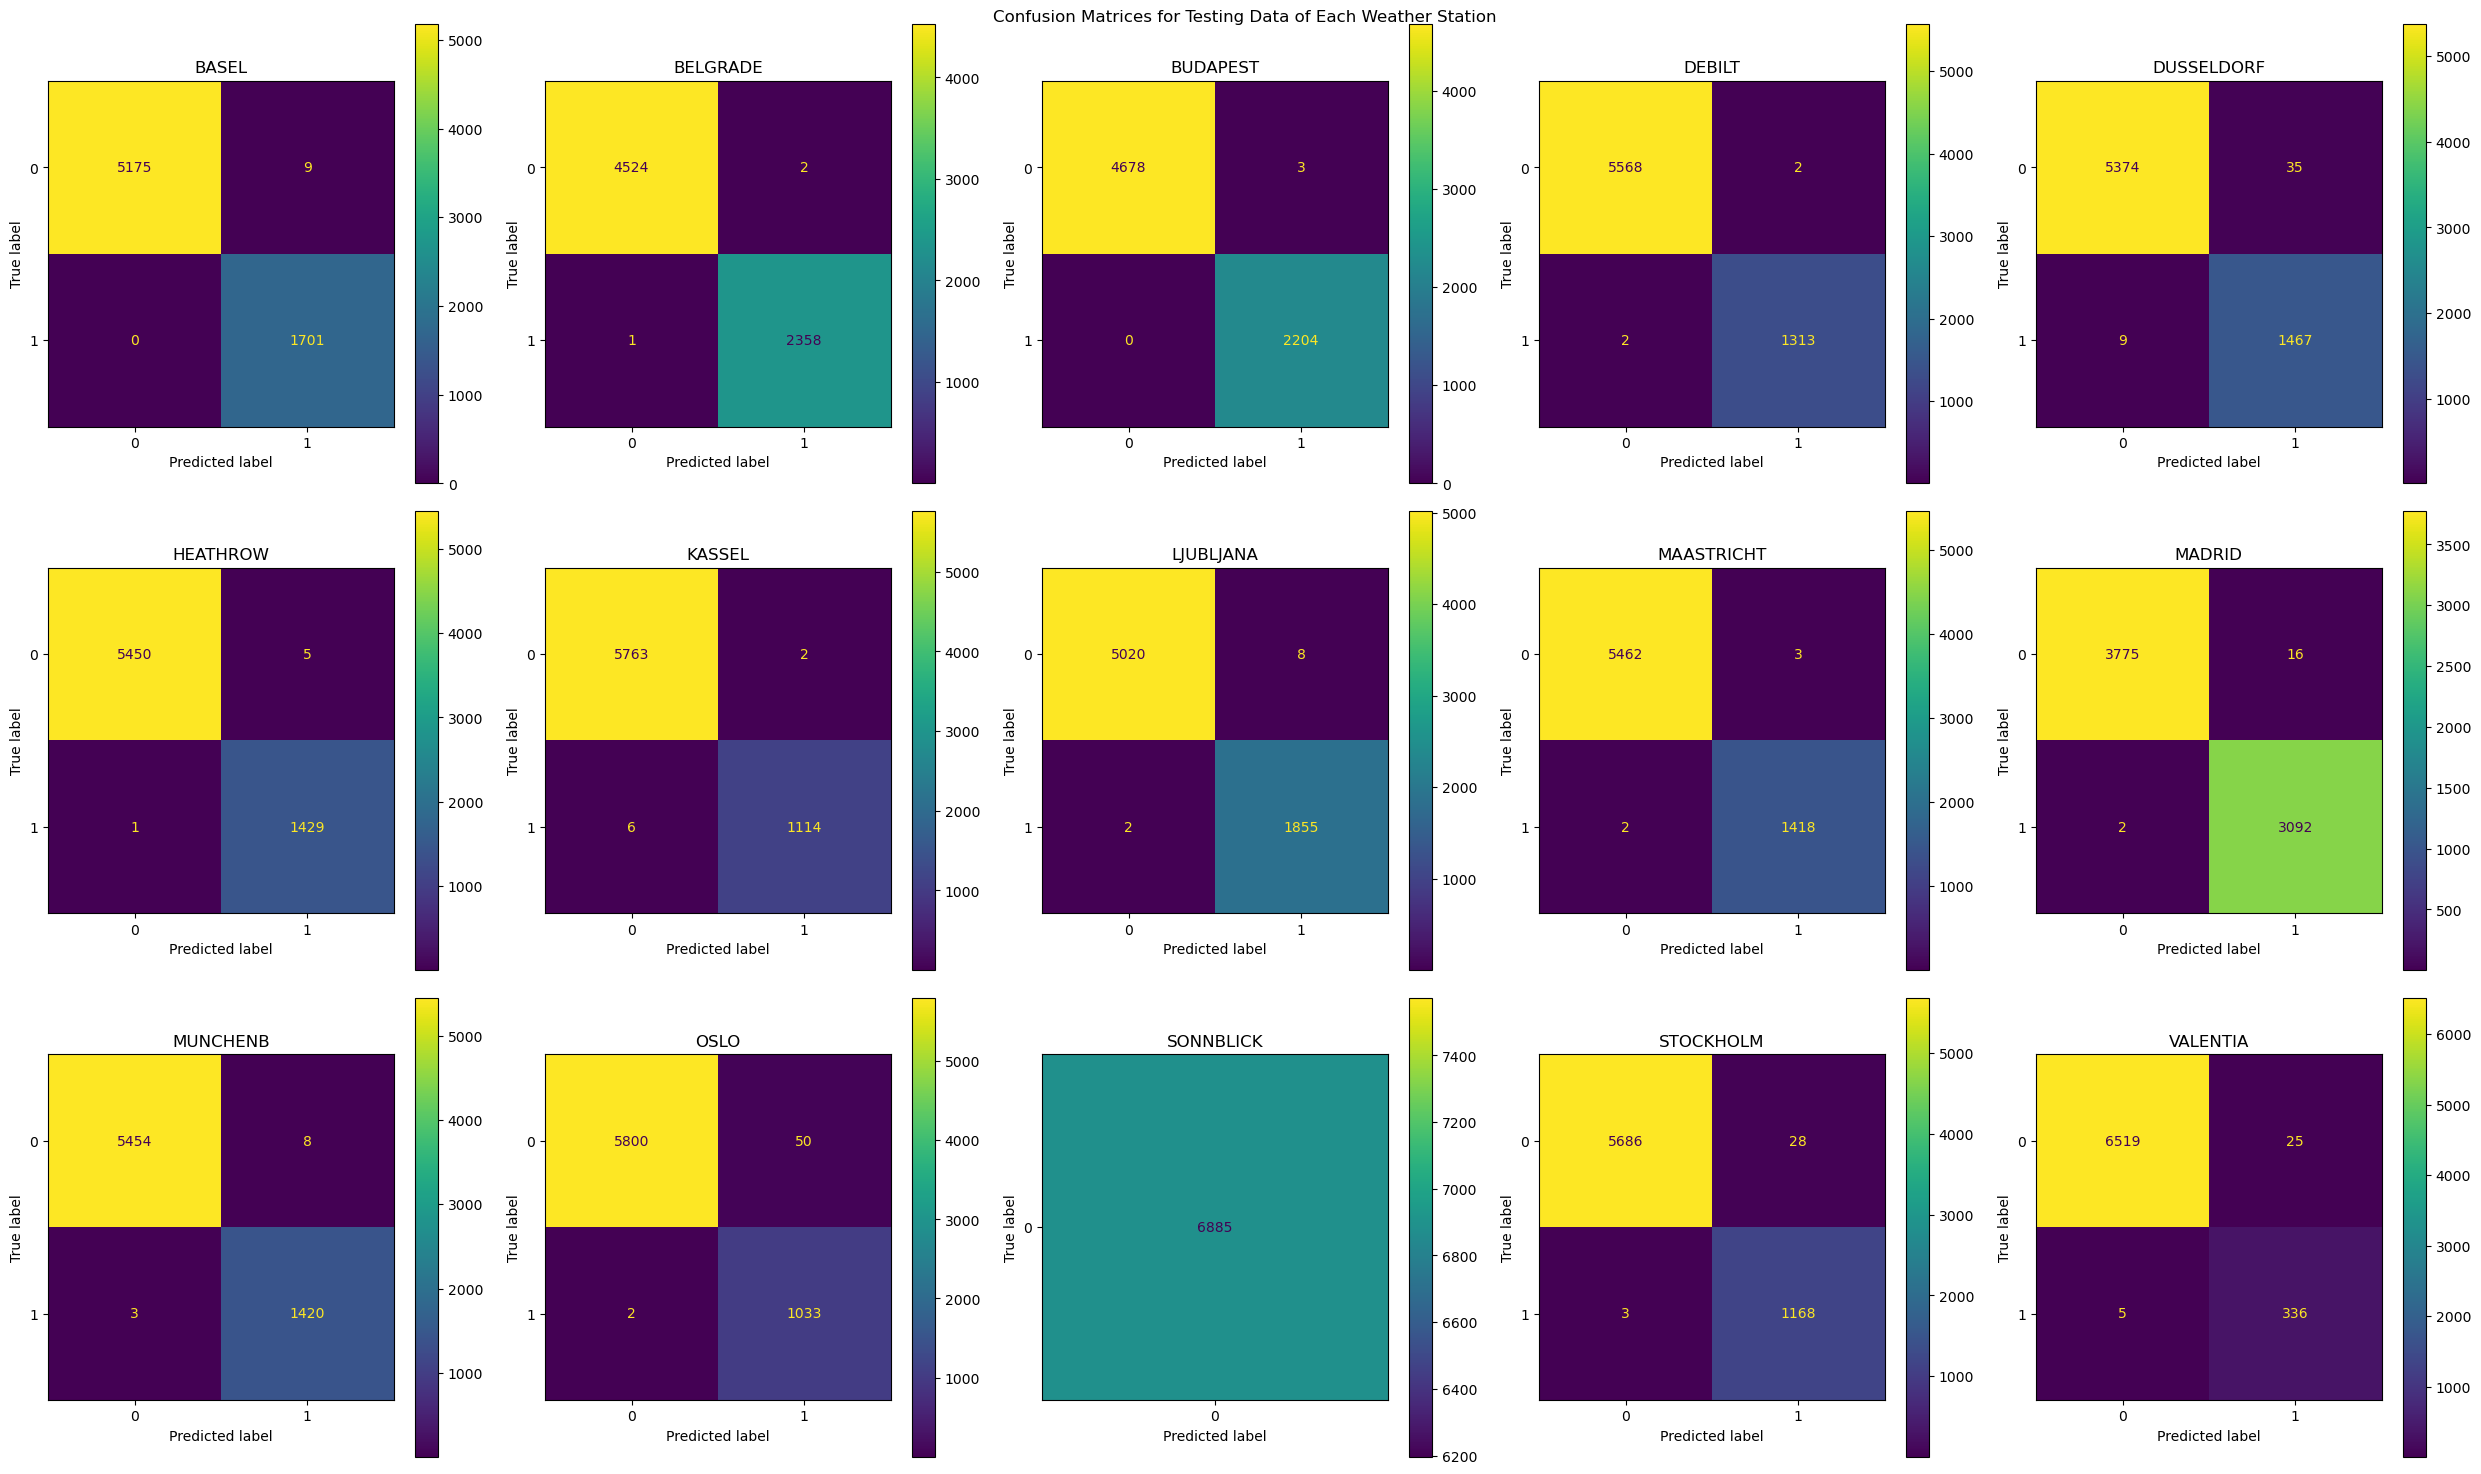

In [72]:
# Create and display confusion matrices for testing data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Testing Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_test_station = y_test_dict[station]
    y_pred_test_station = y_pred_test_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test_station, y_pred_test_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()

### 2.3 Fifth iteration
<div id='2.5'></div>

In [78]:
#Boosting hidden layers to,20,10,10 nodes, setting iterations to 1000 with same level of tolerance

# List of weather stations
stations = locations

# Initialize dictionaries to store models, scores, and confusion matrices
models = {}
scores = {}
y_train_dict = {}
y_test_dict = {}
y_pred_train_dict = {}
y_pred_test_dict = {}

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and predict using ANN models for each station
for station in stations:
    # Prepare the data for the station
    X_station = X_scaled[:, [j for j, col in enumerate(X.columns) if col.startswith(station)]]
    y_station = y[station + '_pleasant_weather']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_station, y_station, test_size=0.3, random_state=42)
    
    # Create and train the ANN model
    model = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001) #here for the new parameter !
    model.fit(X_train, y_train)
    
    # Predict the labels for training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate the accuracy score
    score = accuracy_score(y_test, y_pred_test)
    scores[station] = score
    
    # Store the true labels and predictions
    y_train_dict[station] = y_train
    y_test_dict[station] = y_test
    y_pred_train_dict[station] = y_pred_train
    y_pred_test_dict[station] = y_pred_test

# Print accuracy scores for each station
for station, score in scores.items():
    print(f'{station}: Accuracy = {score:.4f}')


BASEL: Accuracy = 0.9964
BELGRADE: Accuracy = 0.9985
BUDAPEST: Accuracy = 0.9985
DEBILT: Accuracy = 0.9974
DUSSELDORF: Accuracy = 0.9978
HEATHROW: Accuracy = 0.9983
KASSEL: Accuracy = 0.9978
LJUBLJANA: Accuracy = 0.9869
MAASTRICHT: Accuracy = 0.9940
MADRID: Accuracy = 0.9951
MUNCHENB: Accuracy = 0.9980
OSLO: Accuracy = 0.9911
SONNBLICK: Accuracy = 1.0000
STOCKHOLM: Accuracy = 0.9967
VALENTIA: Accuracy = 0.9955


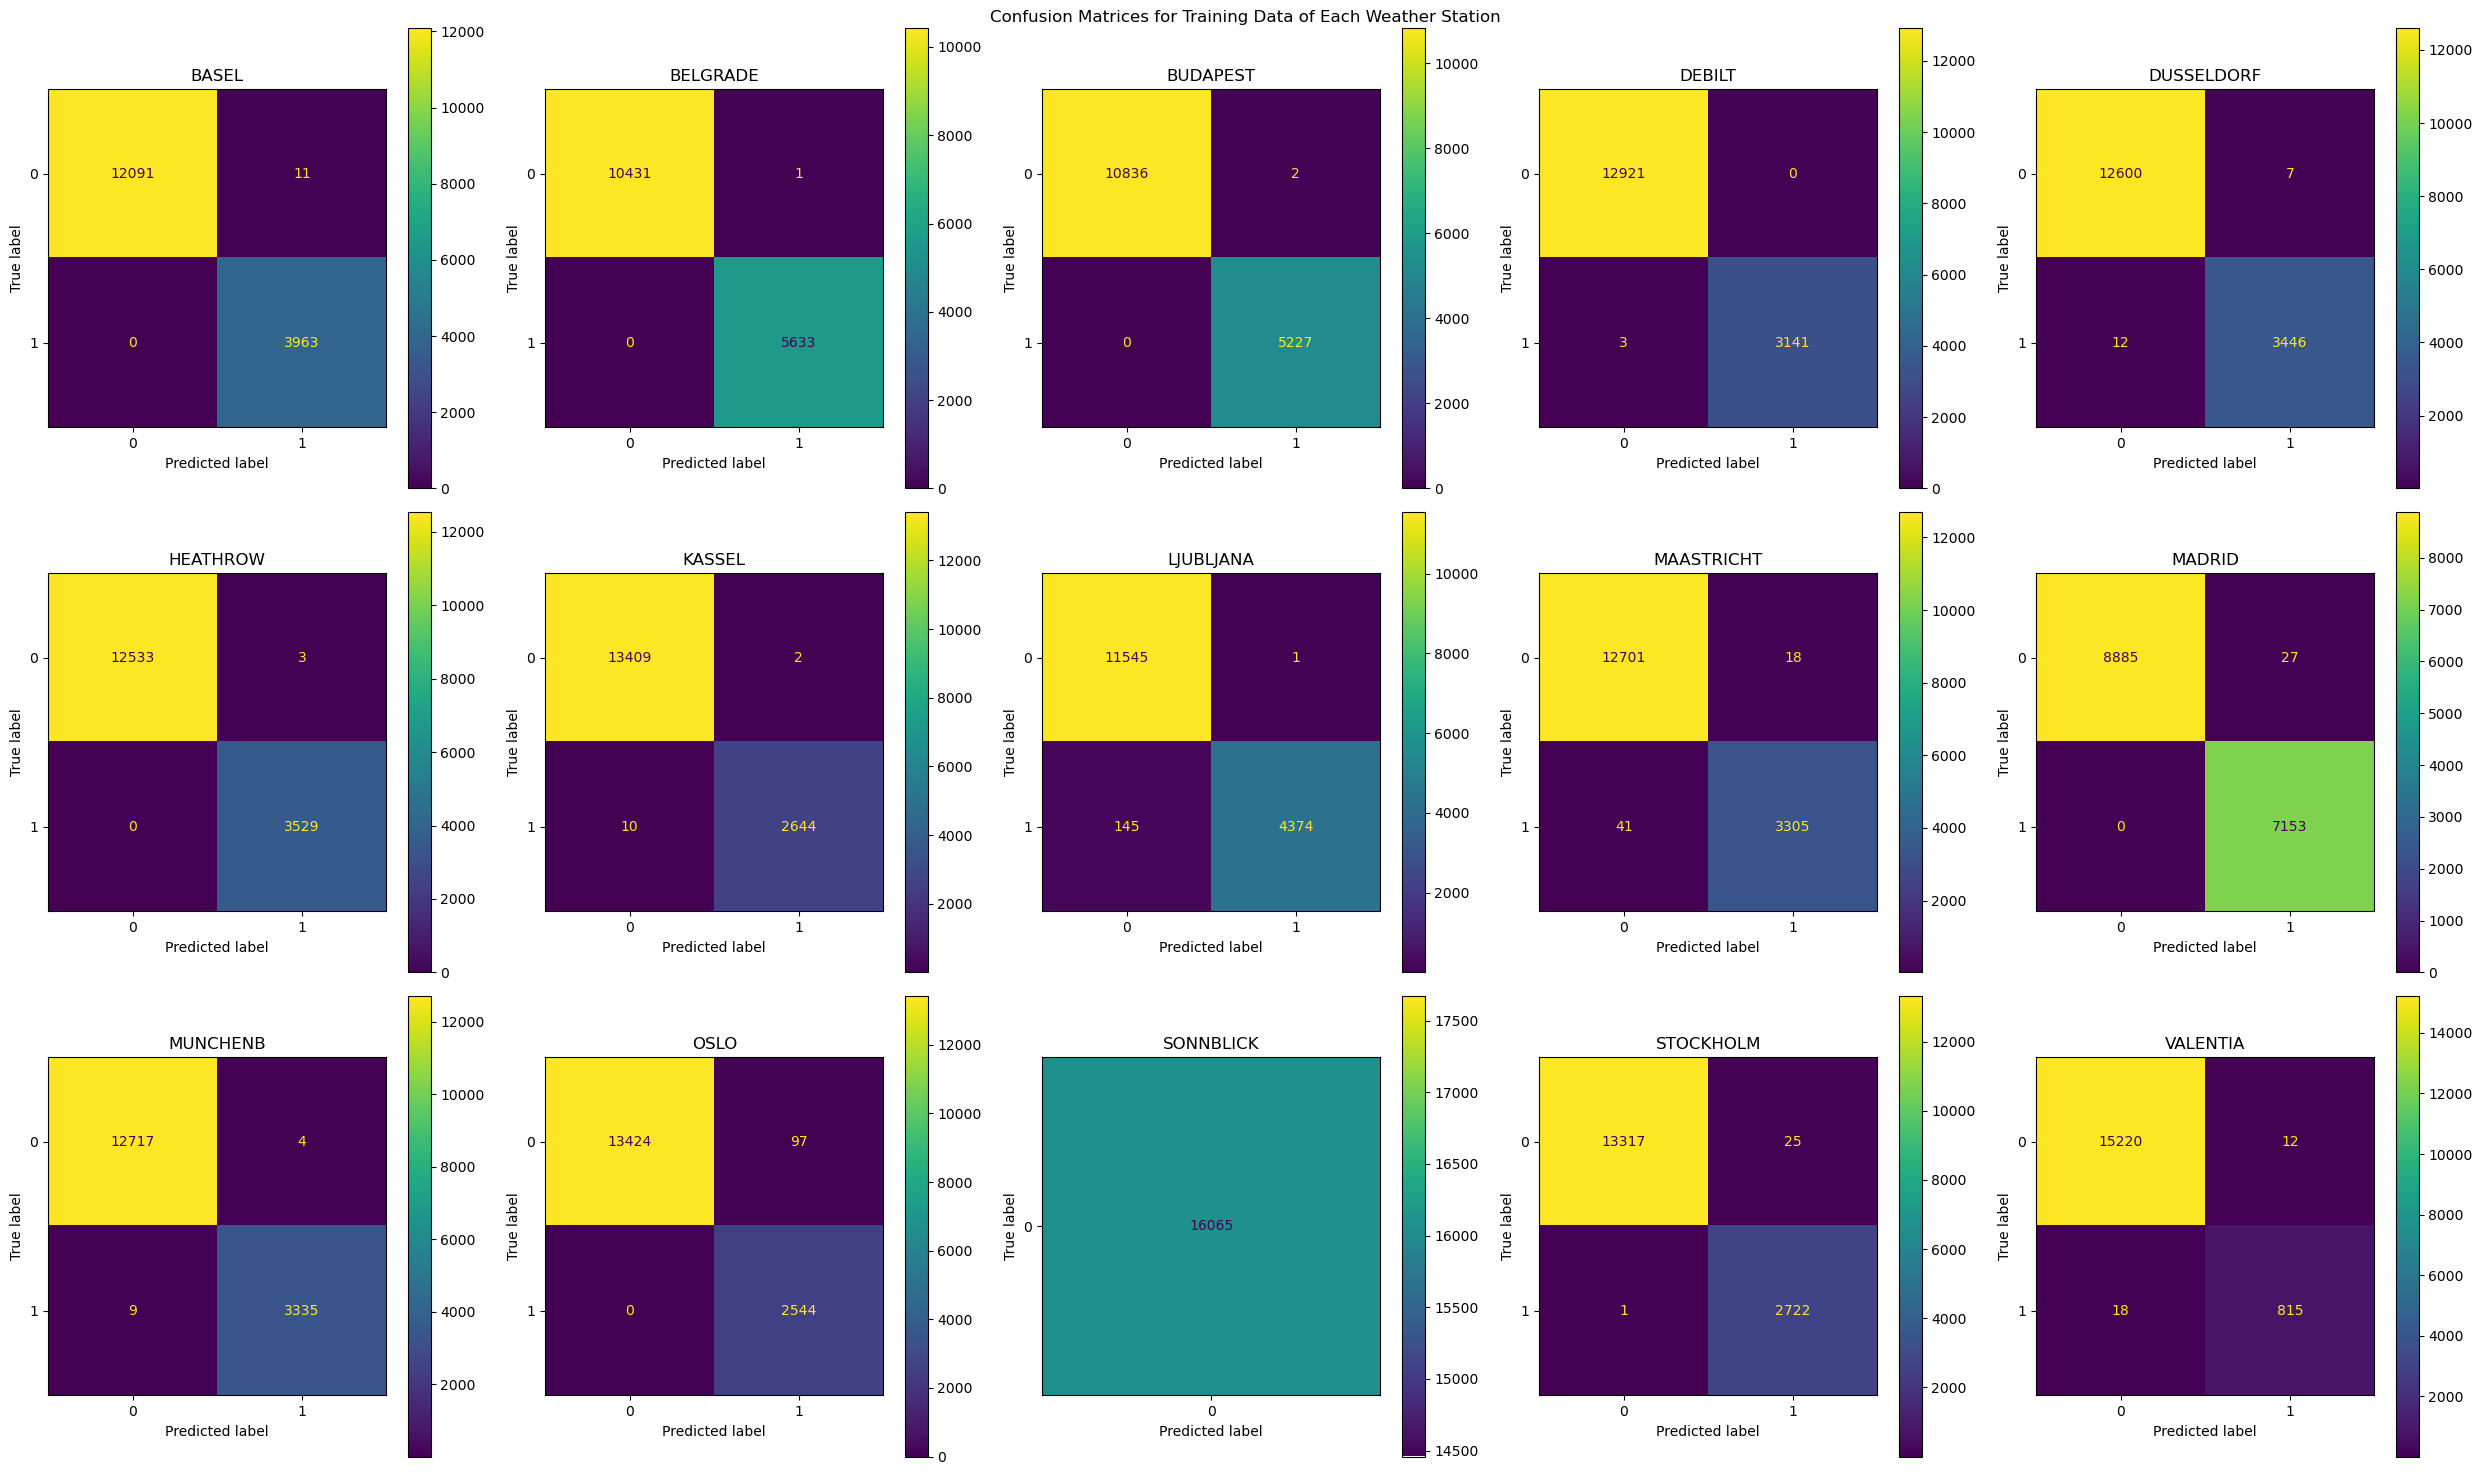

In [79]:
# Create and display confusion matrices for training data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Training Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_train_station = y_train_dict[station]
    y_pred_train_station = y_pred_train_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_train_station, y_pred_train_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()

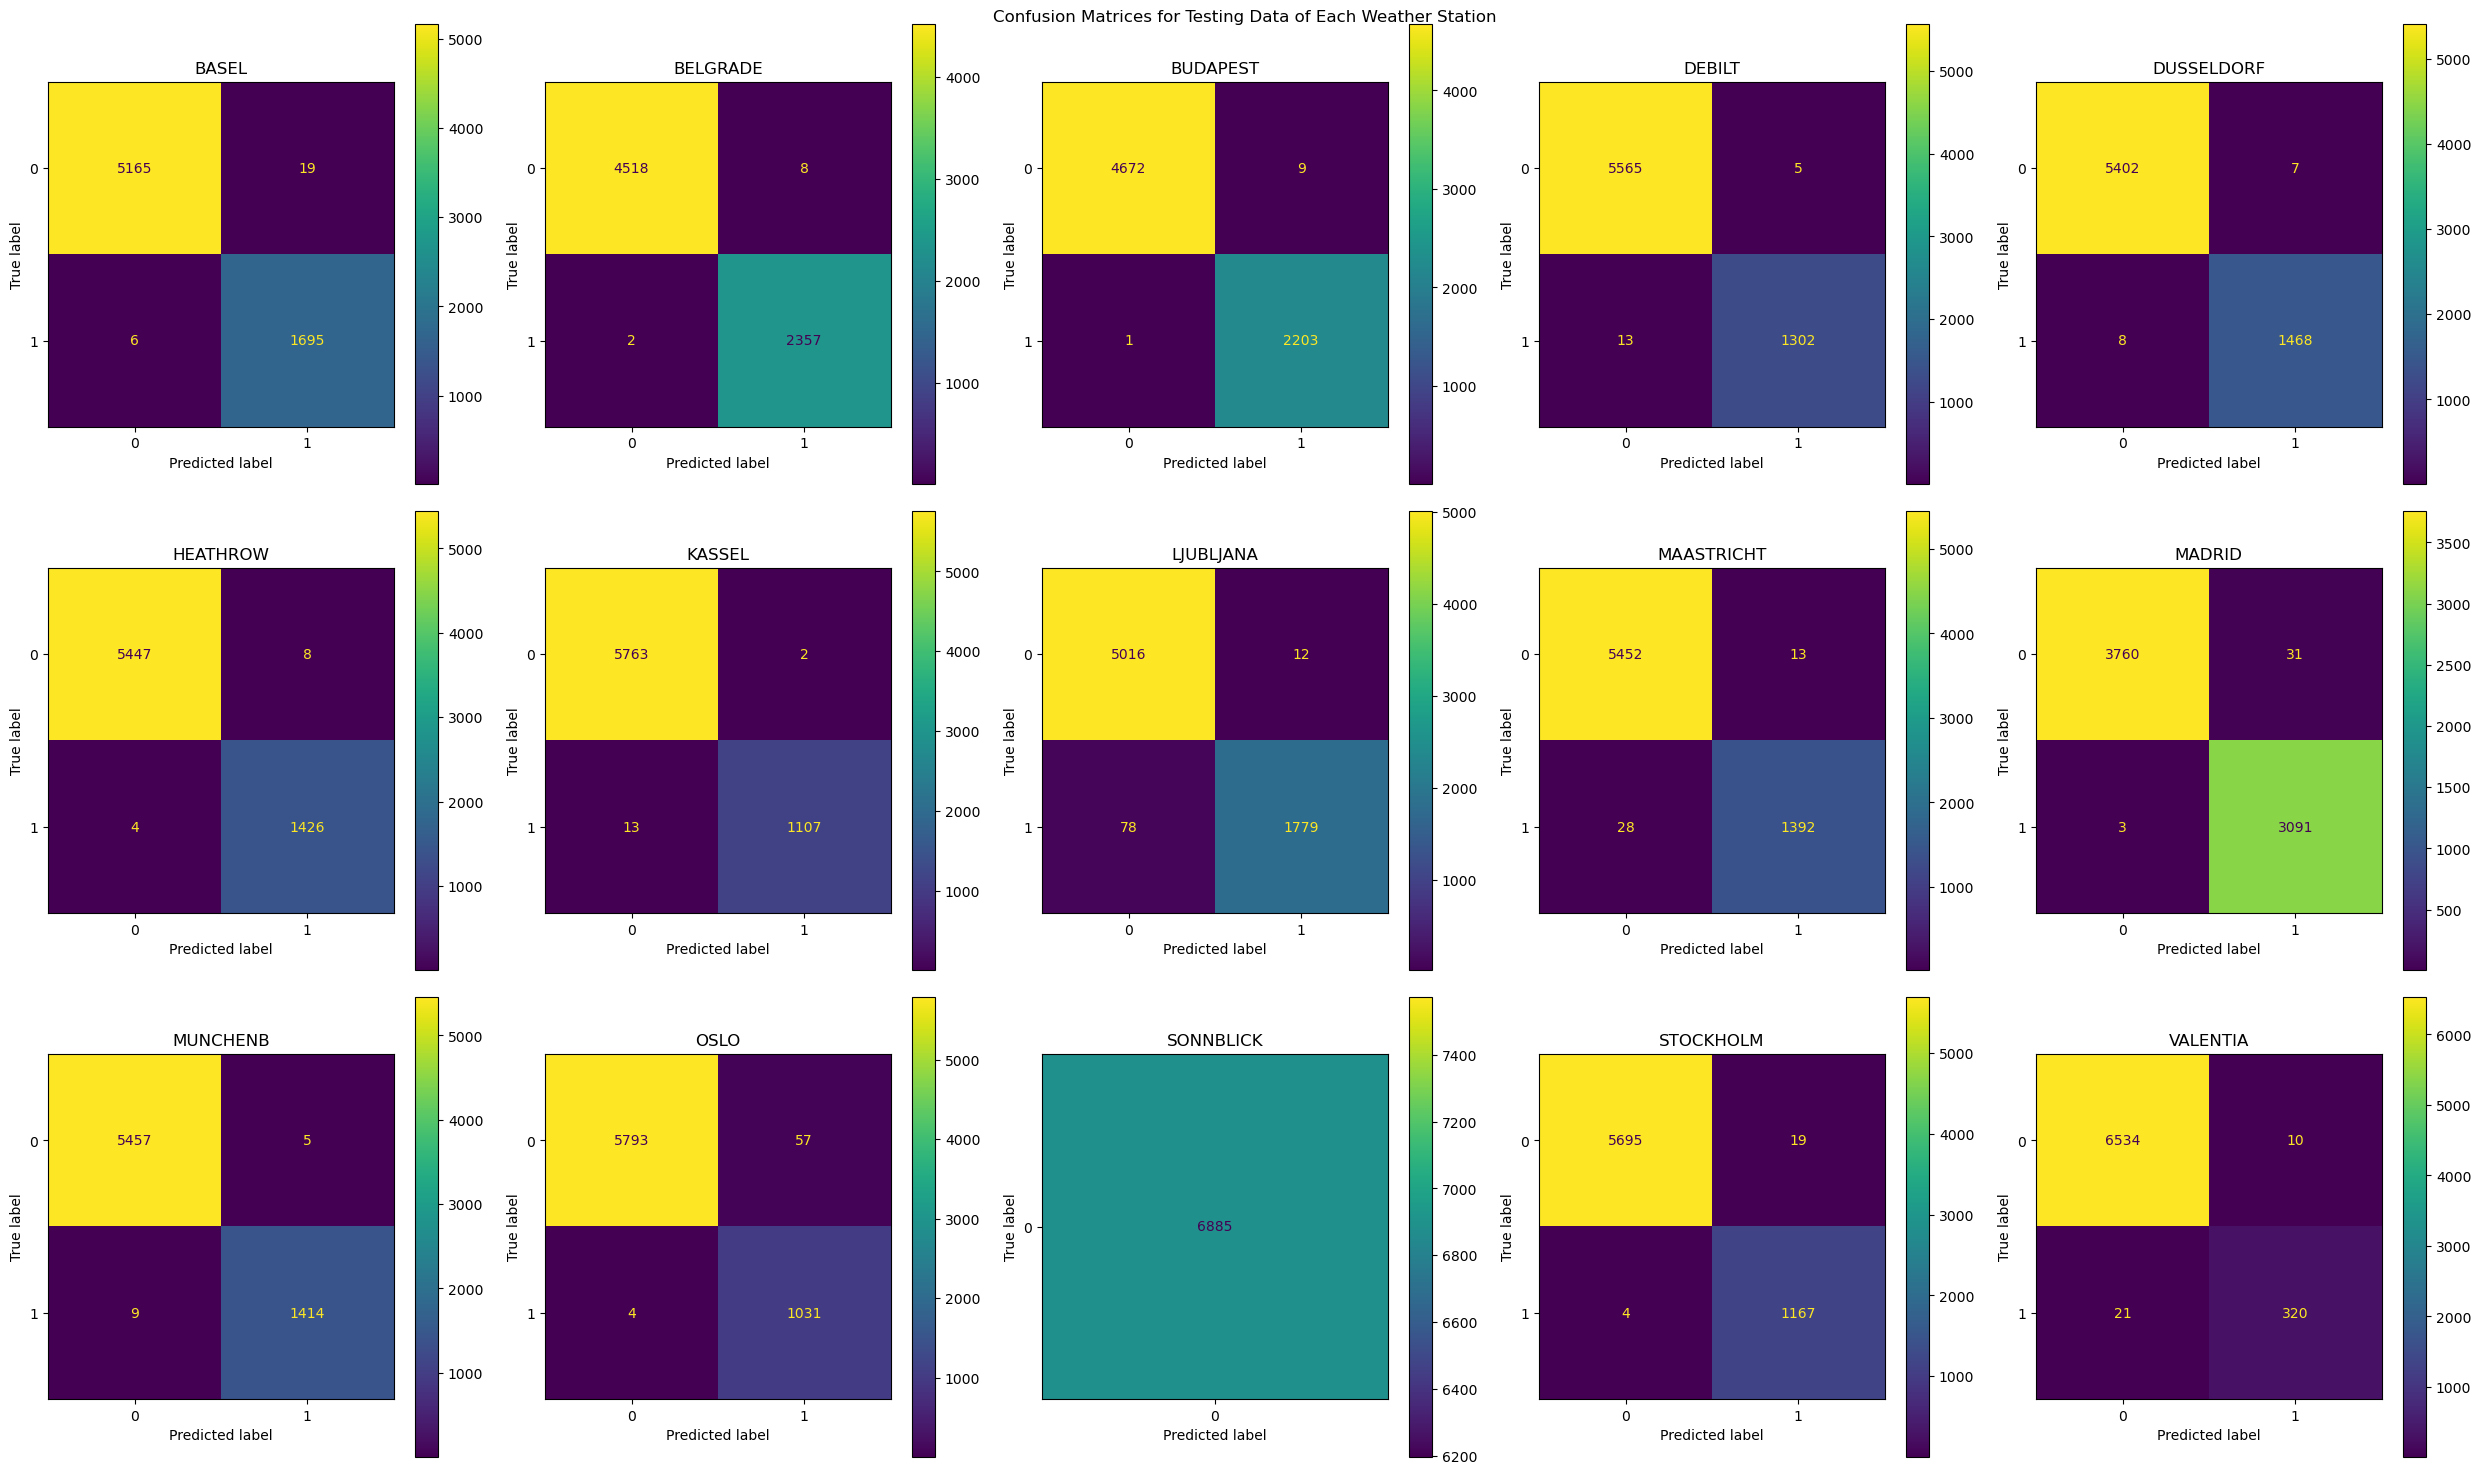

In [80]:
# Create and display confusion matrices for testing data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Testing Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_test_station = y_test_dict[station]
    y_pred_test_station = y_pred_test_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test_station, y_pred_test_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()

### 2.3 Sixth iteration
<div id='2.6'></div>

In [86]:
#Boosting hidden layers to,20,20,20 nodes, setting iterations to 2000 with new level of tolerance of 0.00001(.5f)

# List of weather stations
stations = locations

# Initialize dictionaries to store models, scores, and confusion matrices
models = {}
scores = {}
y_train_dict = {}
y_test_dict = {}
y_pred_train_dict = {}
y_pred_test_dict = {}

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and predict using ANN models for each station
for station in stations:
    # Prepare the data for the station
    X_station = X_scaled[:, [j for j, col in enumerate(X.columns) if col.startswith(station)]]
    y_station = y[station + '_pleasant_weather']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_station, y_station, test_size=0.3, random_state=42)
    
    # Create and train the ANN model
    model = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=2000, tol=0.00001) #here for the new parameter !
    model.fit(X_train, y_train)
    
    # Predict the labels for training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate the accuracy score
    score = accuracy_score(y_test, y_pred_test)
    scores[station] = score
    
    # Store the true labels and predictions
    y_train_dict[station] = y_train
    y_test_dict[station] = y_test
    y_pred_train_dict[station] = y_pred_train
    y_pred_test_dict[station] = y_pred_test

# Print accuracy scores for each station
for station, score in scores.items():
    print(f'{station}: Accuracy = {score:.4f}')


BASEL: Accuracy = 0.9956
BELGRADE: Accuracy = 0.9985
BUDAPEST: Accuracy = 0.9975
DEBILT: Accuracy = 0.9954
DUSSELDORF: Accuracy = 0.9961
HEATHROW: Accuracy = 0.9967
KASSEL: Accuracy = 0.9971
LJUBLJANA: Accuracy = 0.9924
MAASTRICHT: Accuracy = 0.9965
MADRID: Accuracy = 0.9955
MUNCHENB: Accuracy = 0.9978
OSLO: Accuracy = 0.9955
SONNBLICK: Accuracy = 1.0000
STOCKHOLM: Accuracy = 0.9985
VALENTIA: Accuracy = 0.9946


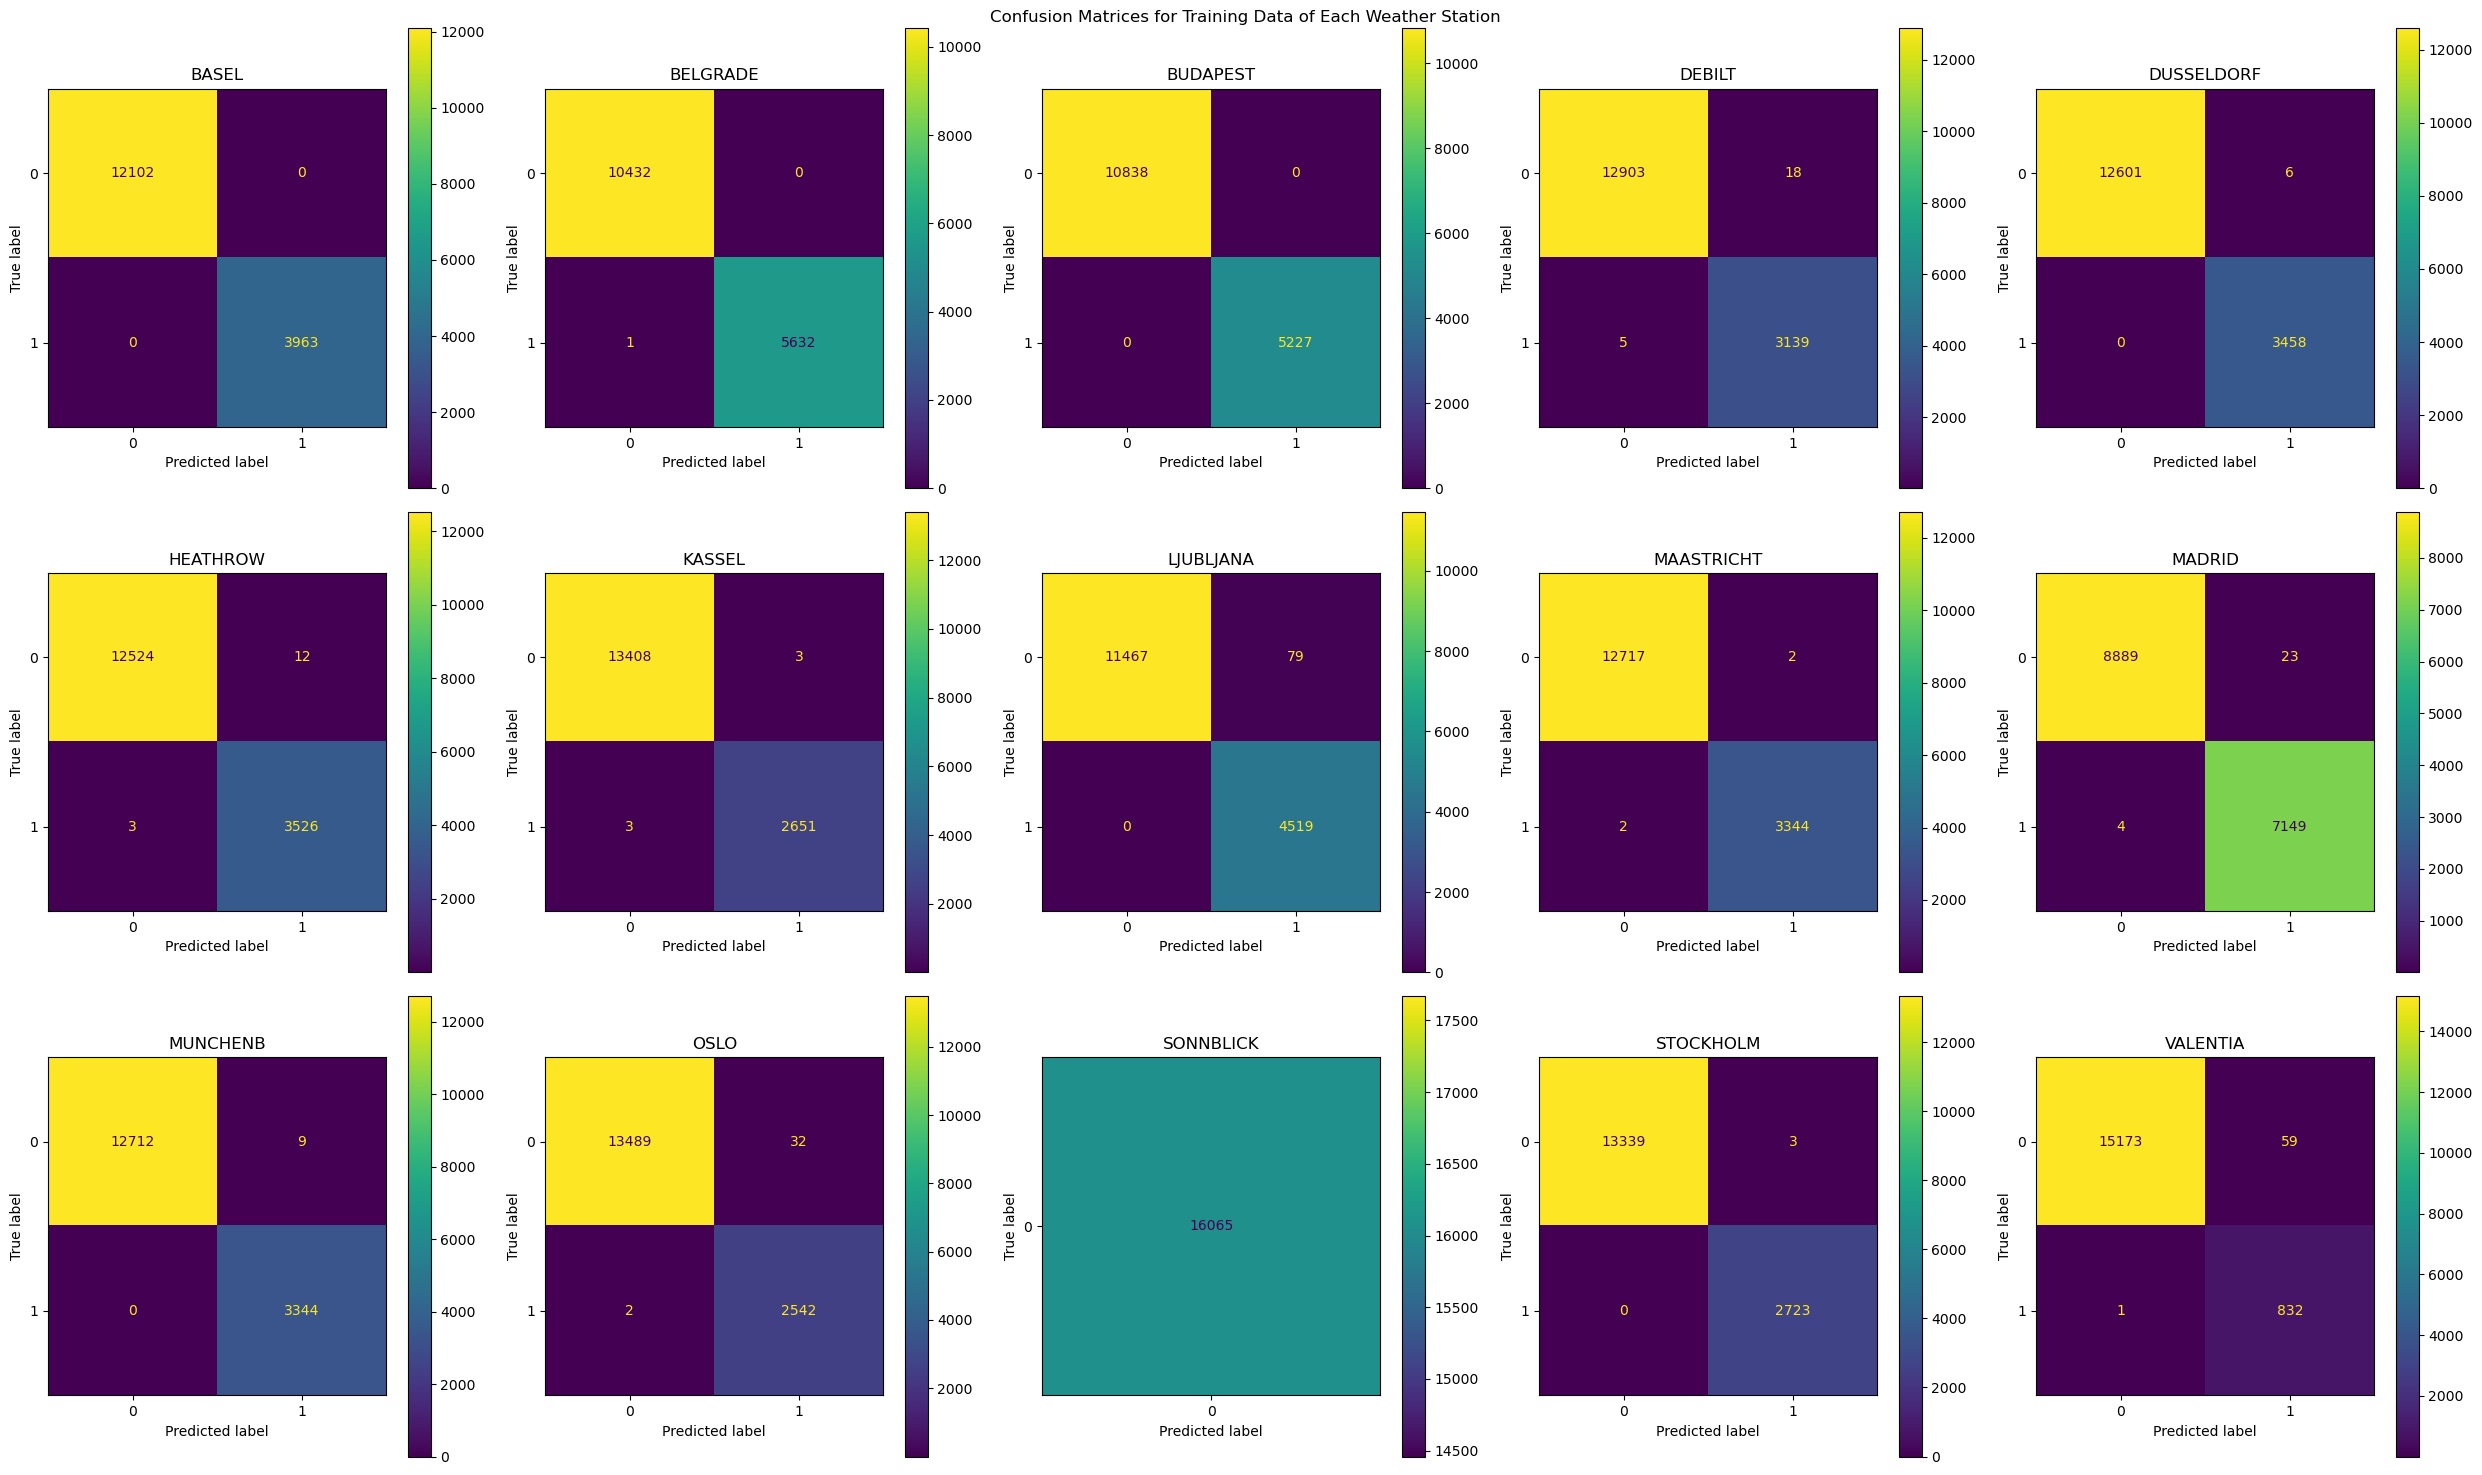

In [87]:
# Create and display confusion matrices for training data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Training Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_train_station = y_train_dict[station]
    y_pred_train_station = y_pred_train_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_train_station, y_pred_train_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()

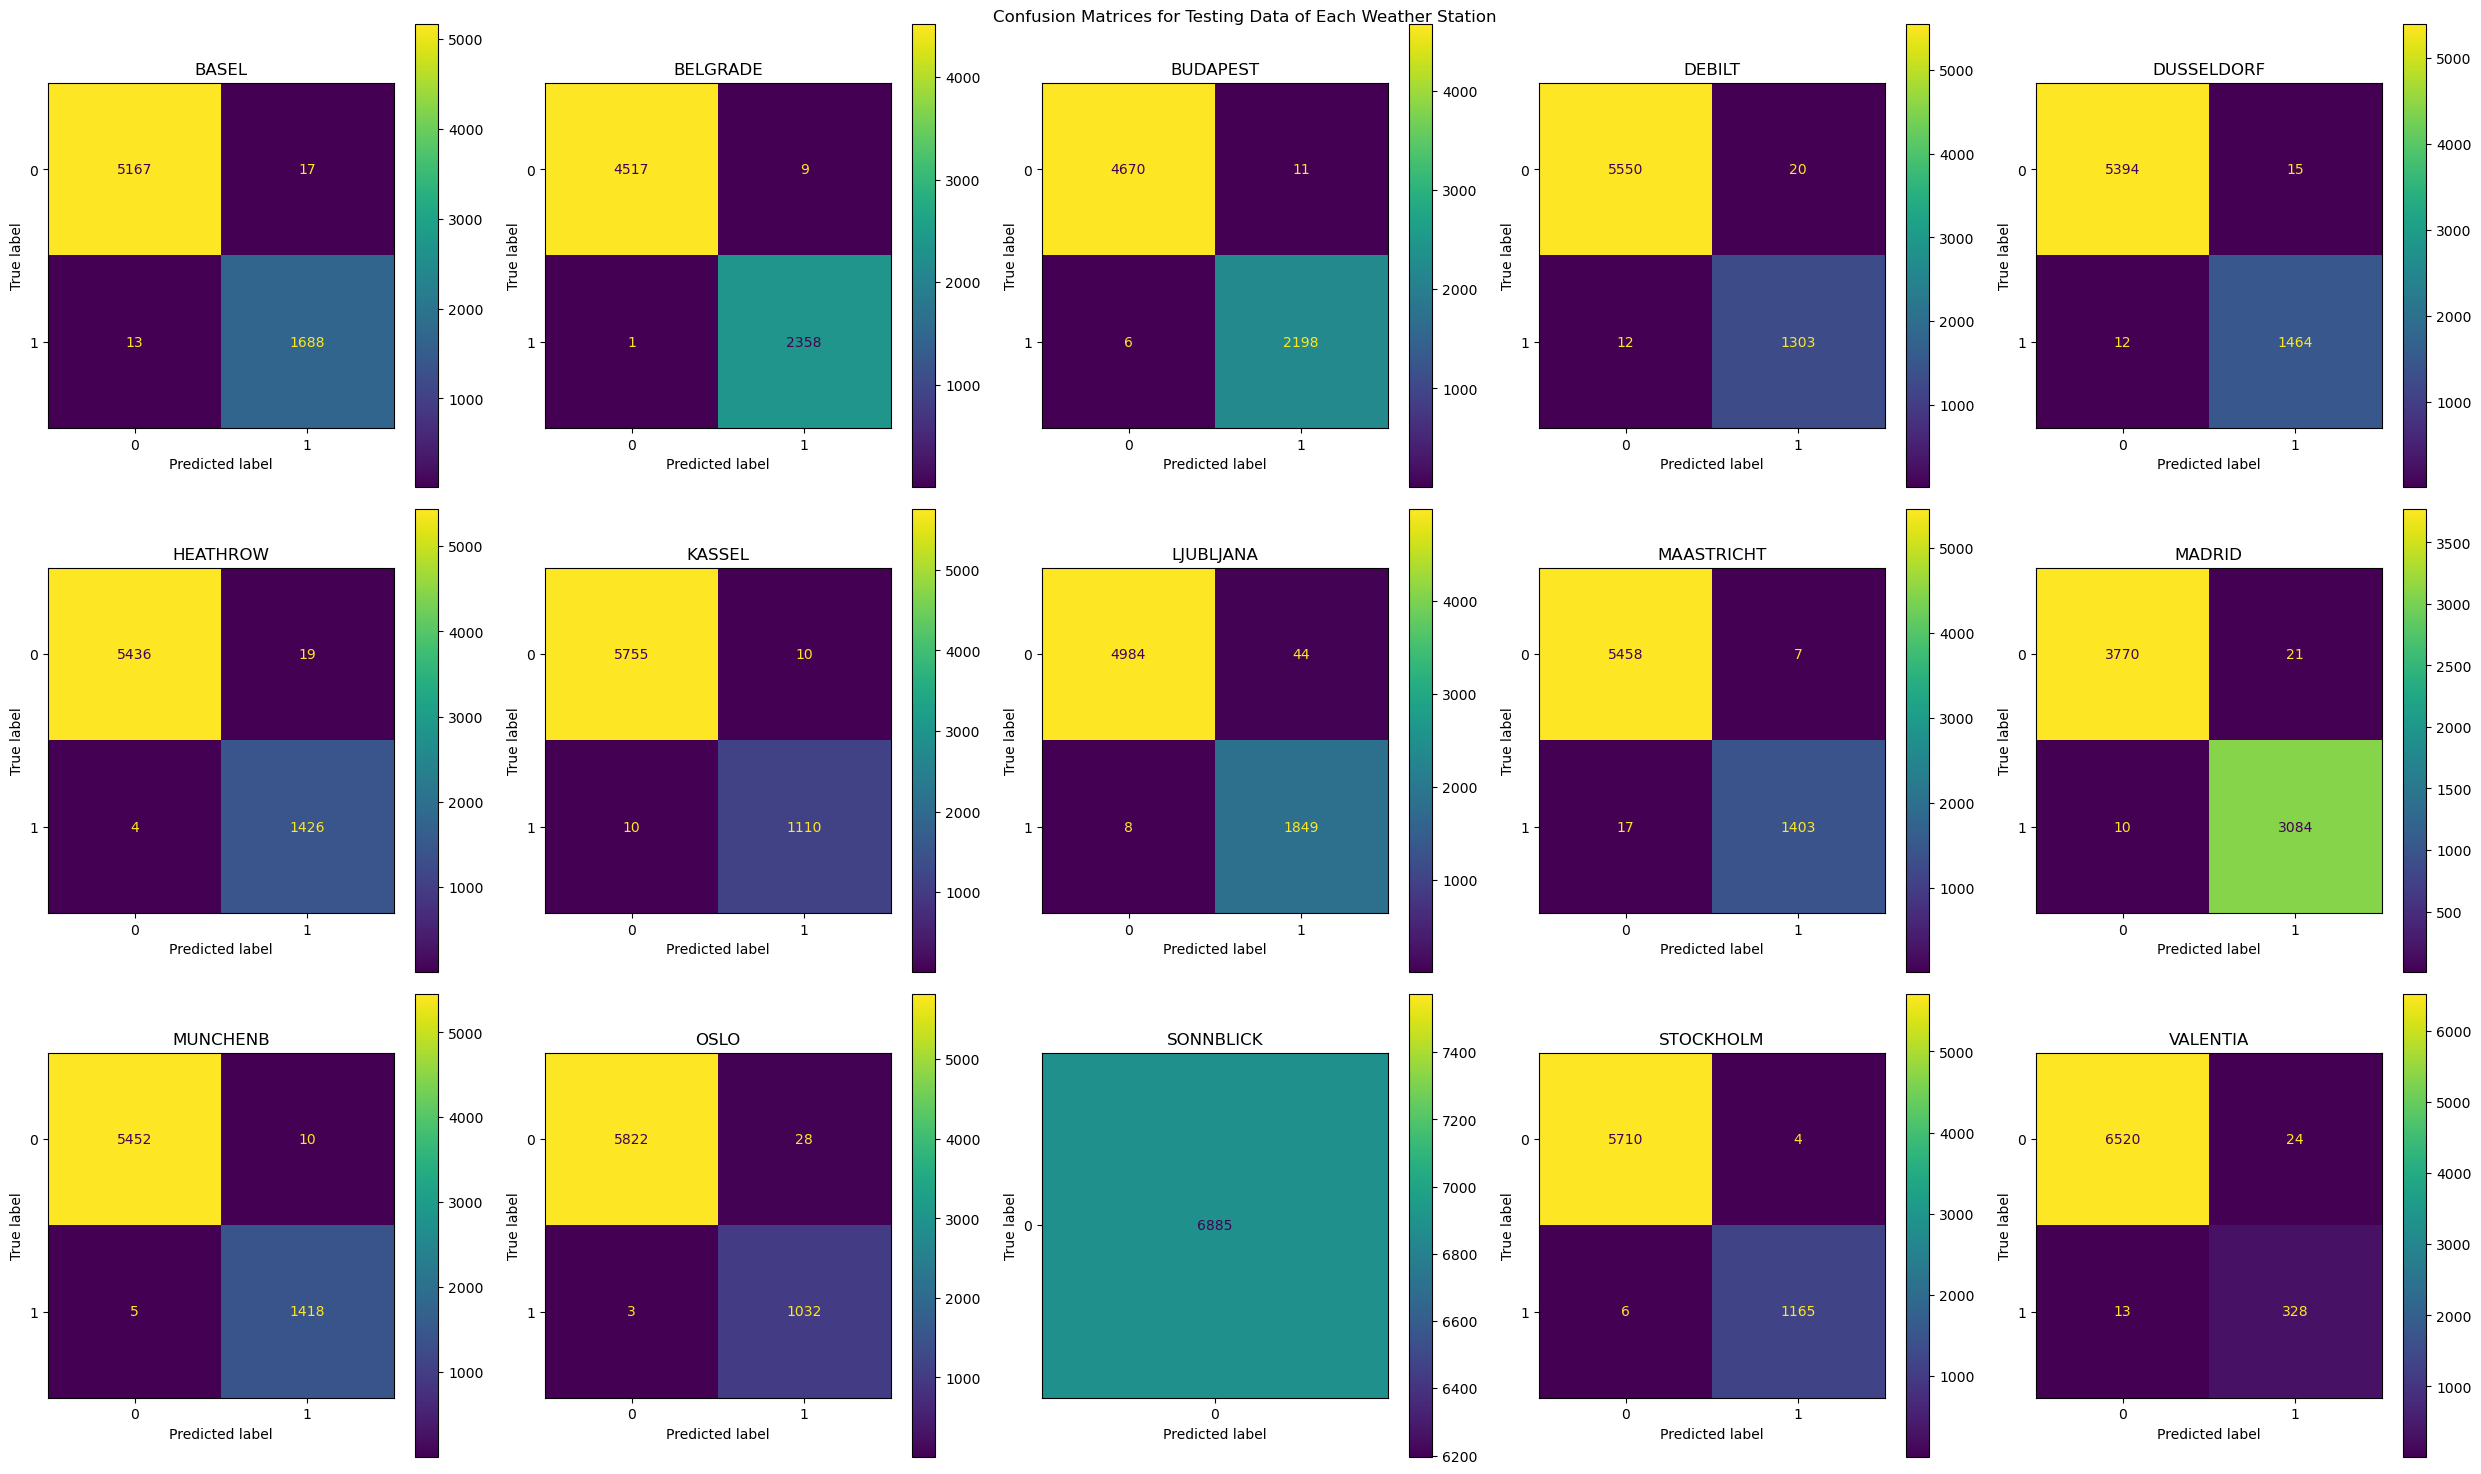

In [88]:
# Create and display confusion matrices for testing data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle('Confusion Matrices for Testing Data of Each Weather Station')

for i, station in enumerate(stations):
    # Get the true labels and predictions for the station
    y_test_station = y_test_dict[station]
    y_pred_test_station = y_pred_test_dict[station]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test_station, y_pred_test_station)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i // 5, i % 5]
    disp.plot(ax=ax, values_format='d')
    ax.set_title(station)

plt.tight_layout()
plt.show()